In [1]:
import sys
# please insert the glycompare to the PATH
sys.path.insert(0, '/Users/apple/PycharmProjects/GlyCompare/')

In [2]:
import os
from importlib import reload

import pandas as pd
import seaborn as sns
from scipy.stats import zscore

from glycompare import *
import matplotlib.pyplot as plt
from copy import deepcopy
# reload(pipeline_functions)
%matplotlib inline


Thanks for using the GlyCompare v1.1, 
Please check our github for the latest update.


Bokan & Ben,
10/2/2019




# Initialization


    04/02/2019 need to approve parse the meta table, glycan id (unresolved)
    04/14/2019 modified for the paper 


In [3]:
# parameter setting 
# environment parameter setting 
glycompare_addr = '/Users/apple/PycharmProjects/GlyCompare/'
glytoucan_db_addr = os.path.join(glycompare_addr, 'glycompare','database', 'glytoucan_database.json')
# __init__.num_processors = 4
# __init__.exact_Ture = False
linkage_specific = False
num_processors = 8
# project parameter
working_addr = '/Users/apple/PycharmProjects/GlyCompare/example_data/paper_epo/'
project_name = "paper_epo"
costumized_glycan_identifier = True
external_profile_naming= True
reload(pipeline_functions)

# initiator
keywords_dict = pipeline_functions.load_para_keywords(project_name, working_addr, glytoucan_db_addr=glytoucan_db_addr)
keywords_dict

{'project_name': 'paper_epo',
 'working_addr': '/Users/apple/PycharmProjects/GlyCompare/example_data/paper_epo/',
 'glycoct_dir': '/Users/apple/PycharmProjects/GlyCompare/example_data/paper_epo/glycoct/',
 'source_dir': '/Users/apple/PycharmProjects/GlyCompare/example_data/paper_epo/source_data/',
 'output_data_dir': '/Users/apple/PycharmProjects/GlyCompare/example_data/paper_epo/output_data/',
 'plot_output_dir': '/Users/apple/PycharmProjects/GlyCompare/example_data/paper_epo/output_plot/',
 'glycan_glycoct_dict_addr': '/Users/apple/PycharmProjects/GlyCompare/example_data/paper_epo/output_data/paper_epo_glycan_glycoct_dict.json',
 'glycan_substructure_glycoct_dict_addr': '/Users/apple/PycharmProjects/GlyCompare/example_data/paper_epo/output_data/paper_epo_glycan_substructure_glycoct_dict.json',
 'substructure_glycoct_dict_addr': '/Users/apple/PycharmProjects/GlyCompare/example_data/paper_epo/output_data/paper_epo_substructure_glycoct_dict.json',
 'substructure_glycoct_vec_addr': '/Use

In [4]:
pipeline_functions.check_init_dir(keywords_dict)

Check if the required files exist
files checked
Check if the required files exist
files checked
Successfully created the directory need, please add the source file is the directory


In [5]:
reload(pipeline_functions)
meta_name = pd.read_csv(os.path.join(working_addr,'source_data','glycan_id_list.txt'), sep='\t')
structure_loader = meta_name['glycan_id'].tolist()
data_type = 'used'
glycan_dict = pipeline_functions.load_glycans_pip(keywords_dict=keywords_dict,
                                           data_type=data_type, 
                                           structure_loader=structure_loader,
                                                 forced=False)


Check if the required files exist
files checked
Check if the required files exist
files checked
Successfully created the directory need, please add the source file is the directory
Loaded the glycan structure from glycan_glycoct_dict


In [6]:
reload(pipeline_functions)
reload(merge_substructure_vec)
glycan_substructure_occurance_dict = pipeline_functions.extract_and_merge_substrutures_pip(keywords_dict, 
                                                                     num_processors=num_processors,
                                                                     linkage_specific=linkage_specific, 
                                                                     forced=False)

start glycan_substructure_dict
finished glycan deconvolution


In [7]:
reload(pipeline_functions)
# print(keywords_dict['name_to_id_addr'])
abd_table = glycan_io.load_table(os.path.join(keywords_dict['source_dir'], 'abundance_table.xls'))

_, glycoprofile_list = pipeline_functions.glycoprofile_pip(keywords_dict, 
                                                           abd_table, 
                                                           unique_glycan_identifier_to_structure_id=False, 
                                                           already_glytoucan_id=False,
                                                           external_profile_naming=True, 
                                                           forced=False)

abd_list 57 profile_list 34
57 34


## We only chose 16 glycoprofiles out of 34 glycoprofiles
    1. There are 34 glycoprofiles in original paper. Yang, Z. et al. Engineered CHO cells for production of diverse, homogeneous glycoproteins. Nat. Biotechnol. 33, 842–844 (2015). 
    2. We only chose 16 gycoprofiles that overlap with glycoprofiles in Čaval, T., Tian, W., Yang, Z., Clausen, H. & Heck, A. J. R. Direct quality control of glycoengineered erythropoietin variants. Nat. Commun. 9, 3342 (2018). Both data are from the same lab. 
    3. We are compareing the similarity of clustering results and showed the clustering difference in supplementary figure S2.


In [8]:
_name_dict = json_utility.load_json(keywords_dict['source_dir']+'external_profile_naming.json')
selected_name_list = ["EPO127.mgat1.",
"EPO174.mgat2.",
"EPO266.fut8.",
"st3gal4.st3gal6.mgat4a.mgat4b.mgat5",
"KI_ST6GalNAc1.st3gal4.st3gal6.mgat4a.mgat4b.mgat5",
"mgat4A.mgat4B.mgat5",
"B3gnt2.mgat4a.mgat4b.mgat5",
"st3gal4.st3gal6", 
"B4GalT1",
"B4GalT2",
"B4GalT3",
"WT",
"B4GalT4",
"EPO78.mgat4B.",
"mgat4A.mgat4B",
"mgat5"]

select_col=[]
_ = {}
for i,j in _name_dict.items():
    _[j] = i
    
for i in selected_name_list:
    select_col.append(_[i])
print(select_col)

['30', '25', '34', '21', '22', '5', '20', '18', '6', '7', '8', '1', '9', '28', '3', '4']


In [9]:
feature_name = []
profile_name = []

selected_profile = [int(i) for i in select_col]
for i in selected_profile:
    profile_name.append(_name_dict[str(i)])
    for j in glycoprofile_list[i-1].glycan_id_list:
        feature_name.append(j)
count_time={}
for i in feature_name:
    count_time[i]=0
for i in selected_profile:
    for j in glycoprofile_list[i-1].glycan_id_list:
        count_time[j] +=1
        
feature_name = list(set(feature_name))
print(feature_name)
print(selected_profile)
print(profile_name)


['G39813YP', '3055.1', '3416.1', 'G05098FE', 'G58667NI', '2605.1', 'G60415BS', 'G07483YN', 'G04483SK', 'G88127MB', 'G20924UR', '3416.3', '3457.1', '3865.1', '4587.1', 'G12398HZ', '1754.1', '2967.1', '3416.2', 'G80393PG', 'G79412GP', 'G99891PR', 'G05203UQ', 'G75308SV', 'G80264ZA', 'G49721VX', 'G85809SI', '2693.2', 'G17689DH', '3592.1', '5312.1', 'G00176HZ', 'G54338PJ', 'G49604DB', 'G30460NZ', 'G76812VG', 'G07568IR', 'G23295TF', 'G90130AG', '5486.1', 'G79457WN', 'G54953LX', 'G40242TG', 'G10691MJ', 'G56516KW', '2401.1', 'G86696LV', 'G09280JF', 'G37597FW', '4041.1', 'G39439UR', 'G88966ZO', '4675.1', 'G80858MF', 'G39764AC']
[30, 25, 34, 21, 22, 5, 20, 18, 6, 7, 8, 1, 9, 28, 3, 4]
['EPO127.mgat1.', 'EPO174.mgat2.', 'EPO266.fut8.', 'st3gal4.st3gal6.mgat4a.mgat4b.mgat5', 'KI_ST6GalNAc1.st3gal4.st3gal6.mgat4a.mgat4b.mgat5', 'mgat4A.mgat4B.mgat5', 'B3gnt2.mgat4a.mgat4b.mgat5', 'st3gal4.st3gal6', 'B4GalT1', 'B4GalT2', 'B4GalT3', 'WT', 'B4GalT4', 'EPO78.mgat4B.', 'mgat4A.mgat4B', 'mgat5']


the glycan core is
start substructure_with core
len 5
len 6
len 7
len 8
len 9
len 10
len 11
len 12
len 13
len 14
len 15
len 16
len 17
len 18
len 19
len 20
len 21
len 22
Finish the n-glycan match  722  substructures are matched to the n-glycan core
start building dependence_tree
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
Start dropping nodes with weight zero, nodes count: 722
Nodes left [96, 139, 140, 199, 200, 201, 282, 283, 284, 285, 390, 391, 392, 393, 394, 395, 396, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101, 1102, 1103, 1104, 1105,

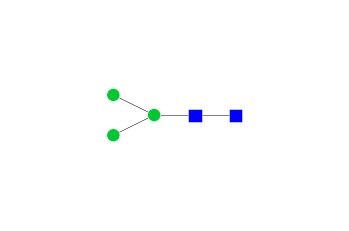

In [10]:
# reload(pipeline_functions)
core=select_motifs.nglycan_core

# motif_abd_table, substructure_lab, merged_weights_dict=pipeline_functions.select_motifs_pip(keywords_dict, 
#                                                                                             linkage_specific=linkage_specific,   
#                                                                                             core=core,
#                                                                                             only_substructures_start_from_root=True,
#                                                                                             select_col= select_col)


substructure_glycoct_dict_addr = keywords_dict['substructure_glycoct_dict_addr']
assert os.path.isfile(substructure_glycoct_dict_addr), 'missing ' + substructure_glycoct_dict_addr
substructure_abd_table_addr = keywords_dict['substructure_abd_table_addr']
assert os.path.isfile(substructure_abd_table_addr), 'missing' + substructure_abd_table_addr

substructure_abd_table = pd.read_csv(substructure_abd_table_addr, index_col=0)
substructure_dict = glycan_io.load_substructure_vec_from_json(substructure_glycoct_dict_addr)

assert core != '', 'Should specify core'
_substructure_lab = select_motifs.substructureLabwithCore(substructure_=substructure_dict,
                                            glycan_core=core,
                                            linkage_specific=linkage_specific)  # unicarbkb_substructures_12259.json
_substructure_lab.get_dependence_tree_core()
a_node_state = select_motifs.NodesState(dependence_tree=_substructure_lab.substructure_dep_tree_core,
                                        substructure_weight=select_motifs.get_weight_dict(
                                            substructure_abd_table[select_col]),
                                        linkage_specific=linkage_specific)
node_attri, edge_attri, mod_nodes, mod_edges, merged_weights_dict = a_node_state.nodes_dropping_pipe(
    drop_parellel=False, drop_diff_abund=False)
print("after selection, the nodes preserved: ", mod_nodes)
print("after selection, the edges preserved: ", mod_edges)

remove_core=True
if remove_core:
    if _substructure_lab.core_index in mod_nodes:
        mod_nodes.remove(_substructure_lab.core_index)
    print("Removed core, the index is", _substructure_lab.core_index)
motif_dict = {}
for i in mod_nodes:
    motif_dict[i] = _substructure_lab.substructure_vec[i]
glycan_io.output_glycan_dict_to_glycoct_dict(motif_dict, keywords_dict['motif_glycoct_dict_addr'])

motif_abd_table = substructure_abd_table[select_col][substructure_abd_table.index.isin(mod_nodes)]
motif_abd_table_addr = keywords_dict['motif_abd_table_addr']
motif_abd_table.to_csv(motif_abd_table_addr)

# motif_abd_table.shape

In [11]:
motif_abd_table.columns=selected_name_list
motif_abd_table

,EPO127.mgat1.,EPO174.mgat2.,EPO266.fut8.,st3gal4.st3gal6.mgat4a.mgat4b.mgat5,KI_ST6GalNAc1.st3gal4.st3gal6.mgat4a.mgat4b.mgat5,mgat4A.mgat4B.mgat5,B3gnt2.mgat4a.mgat4b.mgat5,st3gal4.st3gal6,B4GalT1,B4GalT2,B4GalT3,WT,B4GalT4,EPO78.mgat4B.,mgat4A.mgat4B,mgat5
77,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
84,0.481719,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
92,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
104,0.000000,1.000000,1.000000,0.989516,0.985607,1.000000,0.986382,1.000000,0.405467,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
114,0.000000,1.000000,0.918881,0.000000,0.000000,0.000000,0.000000,0.942668,0.796397,0.819620,0.878569,0.893496,0.935537,1.000000,0.973339,0.667837
115,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
120,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
136,0.948263,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
149,0.000000,1.000000,1.000000,0.000000,0.985607,0.973432,0.952270,0.000000,0.346590,0.984724,1.000000,0.983567,1.000000,1.000000,0.973339,0.968353
150,0.000000,1.000000,0.918881,0.000000,0.000000,0.000000,0.000000,0.942668,0.405467,0.819620,0.878569,0.893496,0.935537,1.000000,0.973339,0.667837


# Raw glycan clustering plot for Fig 2a and Fig S1, 52/77 of glycans in 16 glycoprofiles has non-zero abundance 
### Note: the order of rows and columns might be different from the plots in paper while the hierachy remain stable, because the orders are automatically arranged by algorithm.

In [12]:
import pandas as pd
import numpy as np
abundance_table = np.zeros((len(feature_name), len(selected_profile)))

for i in range(len(selected_profile)):
    _profile_idex = selected_profile[i]-1
    _profile_dict = dict(zip(glycoprofile_list[_profile_idex].glycan_id_list, glycoprofile_list[_profile_idex].relative_abundance))
    
    for j in range(len(feature_name)):
        if feature_name[j] in _profile_dict:
            abundance_table[j,i] = _profile_dict[feature_name[j]]
index_list = []
for i in range(len(abundance_table)):
    if sum(abundance_table[i,:])!=0:
        index_list.append(i)
# len(index_list)
abundance_table = abundance_table[index_list,:]

#     abundance_table[i] = abundance_table[i]/sum(abundance_table[i])
feature_name=[feature_name[i] for i in index_list]
pd_table = pd.DataFrame(abundance_table, columns=profile_name, index=feature_name)
for i in pd_table.columns:
#     print(i,pd_table[i], sum(pd_table[i]))
    pd_table[i] = pd_table[i]/sum(pd_table[i])
    

pd_table.head()

,EPO127.mgat1.,EPO174.mgat2.,EPO266.fut8.,st3gal4.st3gal6.mgat4a.mgat4b.mgat5,KI_ST6GalNAc1.st3gal4.st3gal6.mgat4a.mgat4b.mgat5,mgat4A.mgat4B.mgat5,B3gnt2.mgat4a.mgat4b.mgat5,st3gal4.st3gal6,B4GalT1,B4GalT2,B4GalT3,WT,B4GalT4,EPO78.mgat4B.,mgat4A.mgat4B,mgat5
G39813YP,0.0,0.000000,0.083883,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3416.1,0.0,0.000000,0.000000,0.000000,0.0,0.022814,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
G05098FE,0.0,0.000000,0.239759,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
G58667NI,0.0,0.000000,0.000000,0.048431,0.0,0.000000,0.0,0.011353,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2605.1,0.0,0.206516,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


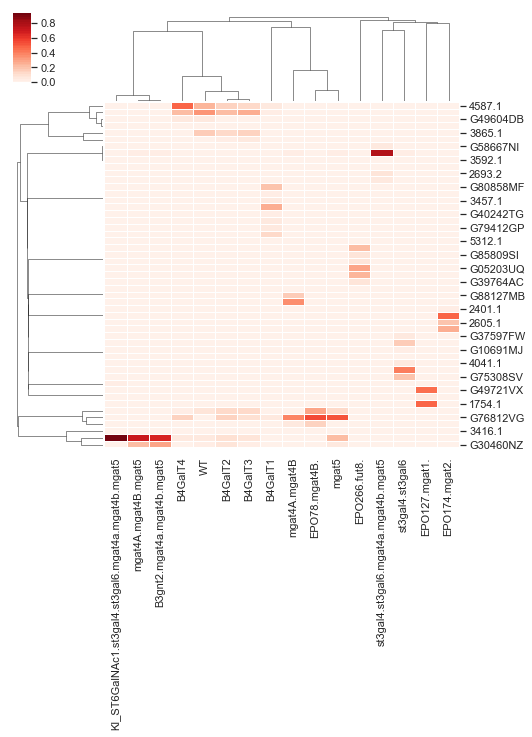

In [278]:
name_prefix = 'full_glycan'
# pd_table.to_csv('/Users/apple/PycharmProjects/Glycompare/paper_supplementory/data_generator/paper_epo/intermediate_file/glycan_abd_table.xls')

cmap = sns.color_palette("Reds", 40)
# g = sns.clustermap(pd_table.round(3), metric="correlation", cmap=cmap, linewidths=.01, annot=False, figsize=(7,7),method='complete')
# plt.savefig(keywords_dict['plot_output_dir']+'raw_glycan_cluster.eps')
g = sns.clustermap(pd_table.round(3), metric="correlation", cmap=cmap, linewidths=.01
                   , figsize=(8,8), linecolor='white', method='complete')
plt.savefig(keywords_dict['plot_output_dir']+'raw_glycan_cluster_no_anno.eps')
# clustering_analysis_pip.draw_profile_cluster(g, pd_table, profile_name, color_threshold=0.95)

# load substructure_abd table

# N.1 mapping the substructure vector to intermediate vector

In [14]:
linkage_unspecified_substructure_vec = glycan_io.load_glycan_dict_from_json('/Users/apple/PycharmProjects/GlyCompare/example_data/merging_network/unspecified_glycan_substructure_glycoct_vec.json')
linkage_unspecified_substructure_dict = glycan_io.substructure_vec_to_substructure_dict(linkage_unspecified_substructure_vec)


In [15]:
# mapping to trash and trash
from glypy.algorithms.subtree_search.inclusion import subtree_of

map_unspecific_to_origin=[]
for idex, i in enumerate(linkage_unspecified_substructure_vec):
    for k in _substructure_lab.substructure_with_core_list:
        if len(_substructure_lab.substructure_vec[k].index) == len(i.index):
            if subtree_of(i, _substructure_lab.substructure_vec[k], exact=False)==1:
                map_unspecific_to_origin.append(k)
                break
                
#     if linkage_unspecified_substructure_vec = linkage_unspecified_substructure_vec
map_unspecific_to_origin

[77,
 92,
 120,
 104,
 114,
 115,
 136,
 149,
 167,
 184,
 168,
 150,
 151,
 163,
 173,
 202,
 256,
 213,
 214,
 249,
 232,
 254,
 212,
 215,
 216,
 217,
 227,
 231,
 237,
 238,
 252,
 344,
 343,
 287,
 301,
 288,
 303,
 328,
 335,
 316,
 336,
 341,
 300,
 302,
 304,
 340,
 314,
 315,
 320,
 321,
 322,
 351,
 337,
 365,
 332,
 403,
 400,
 451,
 452,
 450,
 454,
 399,
 402,
 401,
 416,
 438,
 439,
 447,
 448,
 414,
 415,
 417,
 444,
 449,
 445,
 486,
 422,
 424,
 425,
 426,
 429,
 430,
 431,
 500,
 462,
 463,
 497,
 440,
 487,
 460,
 461,
 588,
 586,
 550,
 547,
 585,
 584,
 587,
 589,
 545,
 546,
 548,
 549,
 602,
 605,
 571,
 577,
 578,
 579,
 583,
 580,
 643,
 556,
 581,
 575,
 582,
 632,
 633,
 634,
 682,
 603,
 558,
 560,
 562,
 563,
 564,
 567,
 568,
 649,
 648,
 604,
 606,
 641,
 646,
 647,
 599,
 600,
 708,
 663,
 750,
 747,
 714,
 713,
 724,
 723,
 745,
 746,
 748,
 749,
 812,
 813,
 721,
 722,
 770,
 774,
 776,
 777,
 771,
 778,
 739,
 743,
 740,
 744,
 806,
 808,
 807,
 854,


# N.2 mapping the edge_network

In [305]:
unspecified_intermediate_network = pd.read_csv('/Users/apple/PycharmProjects/GlyCompare/example_data/merging_network/unspecified_intermediate_network.csv',index_col=0)
origin_enzyme_list = list(unspecified_intermediate_network.enzyme)
# unspecified_intermediate_network

for idex, i in enumerate(origin_enzyme_list):
    if i=='A3SIAT, A6SIAT':
        origin_enzyme_list[idex] = 'A3SIAT'
unspecified_intermediate_network['re_enzyme'] = origin_enzyme_list
unspecified_intermediate_network



,enzyme,index_source,index_target,re_enzyme
0,A6FUCT,0,2,A6FUCT
1,B4GALT,0,3,B4GALT
2,GNTIV,0,4,GNTIV
3,GNTII,0,5,GNTII
4,B4GALT,2,8,B4GALT
5,GNTIV,2,9,GNTIV
6,GNTII,2,10,GNTII
7,"A3SIAT, A6SIAT",3,7,A3SIAT
8,IGNT,3,14,IGNT
9,A6FUCT,4,9,A6FUCT


In [307]:
origin_intermediate_network = deepcopy(unspecified_intermediate_network)
# edge_source = unspecified_intermediate_network.index_source
# edge_target = unspecified_intermediate_network.index_target
for idex,i in enumerate(unspecified_intermediate_network.index):
    origin_intermediate_network.at[i, 'index_source']=map_unspecific_to_origin[unspecified_intermediate_network['index_source'][idex]]
    origin_intermediate_network.at[i, 'index_target']=map_unspecific_to_origin[unspecified_intermediate_network['index_target'][idex]]
#     unspecified_intermediate_network.to_csv('/Users/apple/PycharmProjects/GlyCompare/example_data/paper_epo_2/output_data/unspecified_intermediate_network.csv')

origin_intermediate_network


,enzyme,index_source,index_target,re_enzyme
0,A6FUCT,77,120,A6FUCT
1,B4GALT,77,104,B4GALT
2,GNTIV,77,114,GNTIV
3,GNTII,77,115,GNTII
4,B4GALT,120,167,B4GALT
5,GNTIV,120,184,GNTIV
6,GNTII,120,168,GNTII
7,"A3SIAT, A6SIAT",104,149,A3SIAT
8,IGNT,104,173,IGNT
9,A6FUCT,114,184,A6FUCT


(RES 1b:x-dglc-HEX-1:5 2s:n-acetyl LIN 1:1d(2+1)2n: id=1  x=4.592425496802574e-17 mod=0,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a1b20fa90>)

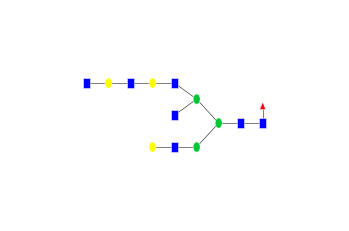

In [18]:
origin_intermediate_network[origin_intermediate_network.enzyme=='B4GALT']
origin_intermediate_network.loc[538,]
plot_glycan_utilities.plot_glycan(_substructure_lab.substructure_vec[1048])

In [19]:
selected_name_list

['EPO127.mgat1.',
 'EPO174.mgat2.',
 'EPO266.fut8.',
 'st3gal4.st3gal6.mgat4a.mgat4b.mgat5',
 'KI_ST6GalNAc1.st3gal4.st3gal6.mgat4a.mgat4b.mgat5',
 'mgat4A.mgat4B.mgat5',
 'B3gnt2.mgat4a.mgat4b.mgat5',
 'st3gal4.st3gal6',
 'B4GalT1',
 'B4GalT2',
 'B4GalT3',
 'WT',
 'B4GalT4',
 'EPO78.mgat4B.',
 'mgat4A.mgat4B',
 'mgat5']

In [20]:
# ratio_['B4GalT1'].dropna()

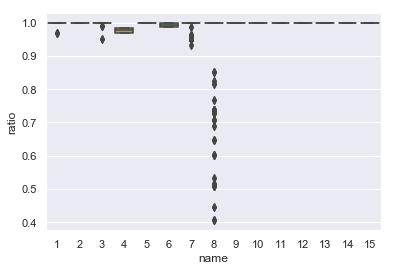

In [21]:
col_len = len(origin_intermediate_network[origin_intermediate_network.enzyme=='B4GALT'].index_source)
ratio_1 = np.zeros((col_len, 16))

for idex,(i,j) in enumerate(zip(origin_intermediate_network[origin_intermediate_network.enzyme=='B4GALT'].index_source, origin_intermediate_network[origin_intermediate_network.enzyme=='B4GALT'].index_target)):
    _a = substructure_abd_table[select_col].loc[i,]
    _b = substructure_abd_table[select_col].loc[j,]
    ratio_1[idex] = _b/_a

ratio_ = pd.DataFrame(ratio_1, columns=selected_name_list)
ratio_
_ratio_series=[]
_name_list = []

# for i in 
for idex, i in enumerate(list(ratio_.columns)):
    
    _temp_series = list(ratio_[i].dropna())
    _ratio_series.extend(_temp_series)
    _name_list+=[idex]*len(_temp_series)
#     plt.hist(_temp_series)
#     plt.title(i)
#     plt.show()
# for i in selected_name_list:
    
# box_percentile = list(glycan_box_percetile)
# box_percentile.extend(list(glysub_box_percetile))
# # akk_series
a_table = pd.DataFrame(data={'ratio':_ratio_series, 'name': _name_list})

selected_name_list = ["EPO127.mgat1.",
"EPO174.mgat2.",
"EPO266.fut8.",
"st3gal4.st3gal6.mgat4a.mgat4b.mgat5",
"KI_ST6GalNAc1.st3gal4.st3gal6.mgat4a.mgat4b.mgat5",
"mgat4A.mgat4B.mgat5",
"B3gnt2.mgat4a.mgat4b.mgat5",
"st3gal4.st3gal6", 
"B4GalT1",
"B4GalT2",
"B4GalT3",
"WT",
"B4GalT4",
"EPO78.mgat4B.",
"mgat4A.mgat4B",
"mgat5"]

ax = sns.boxplot(x="name", y="ratio", data=a_table)
# a_table
    

In [ ]:
selected_name_list = ["EPO127.mgat1.",
"EPO174.mgat2.",
"EPO266.fut8.",
"st3gal4.st3gal6.mgat4a.mgat4b.mgat5",
"KI_ST6GalNAc1.st3gal4.st3gal6.mgat4a.mgat4b.mgat5",
"mgat4A.mgat4B.mgat5",
"B3gnt2.mgat4a.mgat4b.mgat5",
"st3gal4.st3gal6", 
"B4GalT1",
"B4GalT2",
"B4GalT3",
"WT",
"B4GalT4",
"EPO78.mgat4B.",
"mgat4A.mgat4B",
"mgat5"]

In [302]:
ratio_[['EPO266.fut8.', 'WT']].dropna()
# set(list(origin_intermediate_network.enzyme))

,EPO266.fut8.,WT
0,0.918881,0.893496
1,0.647787,0.897797
2,0.918881,0.908424
5,0.647787,0.897797
7,0.647787,0.897797
9,0.647787,0.897797
11,0.647787,0.897797
13,0.712862,1.000000


B4GALT


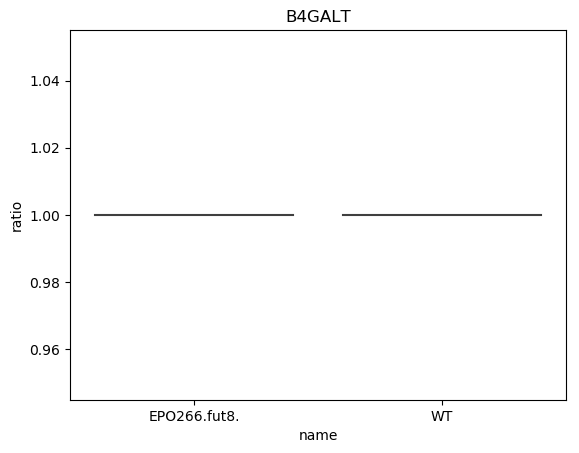

IGNT


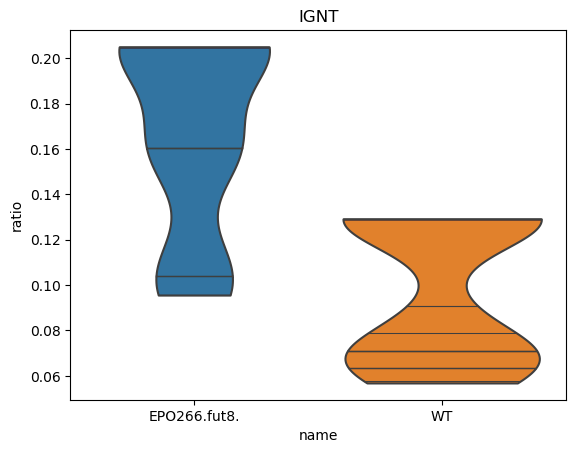

GNTII


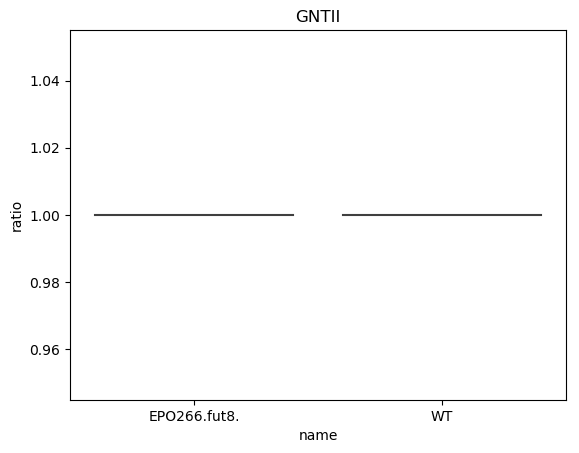

MANII
A6FUCT


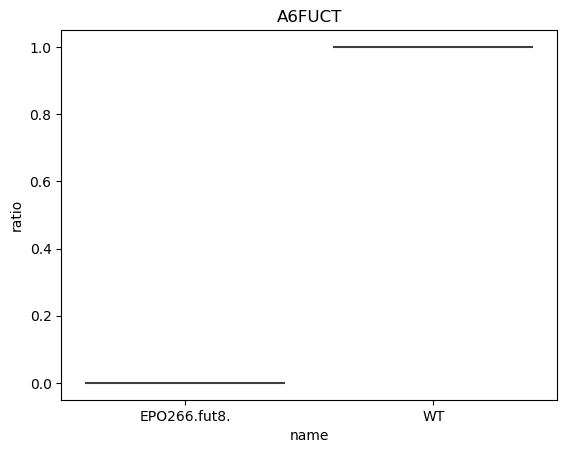

GNTIV


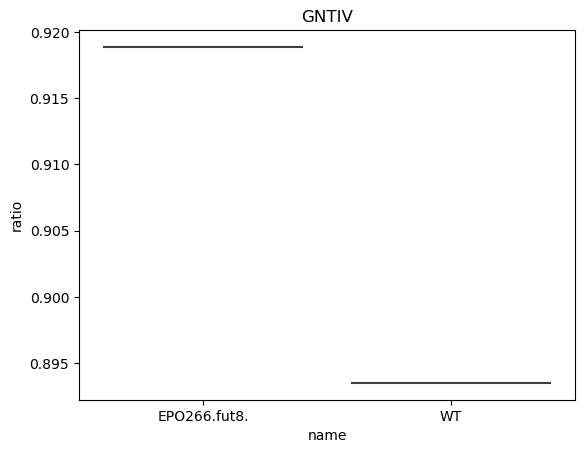

GNTIV, GNTV


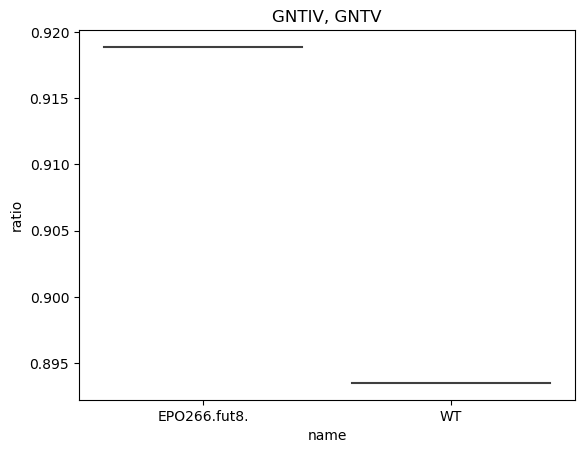

A3SIAT


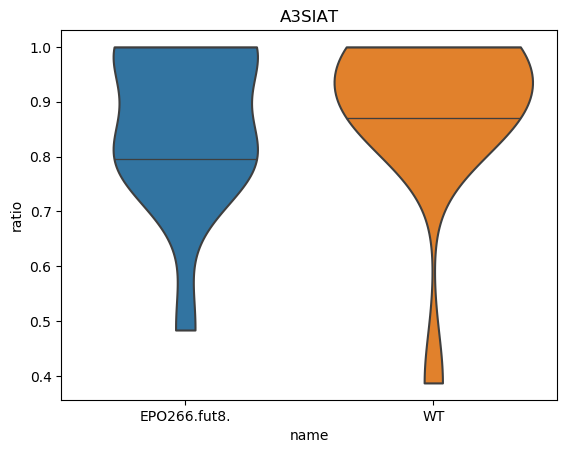

GNTV


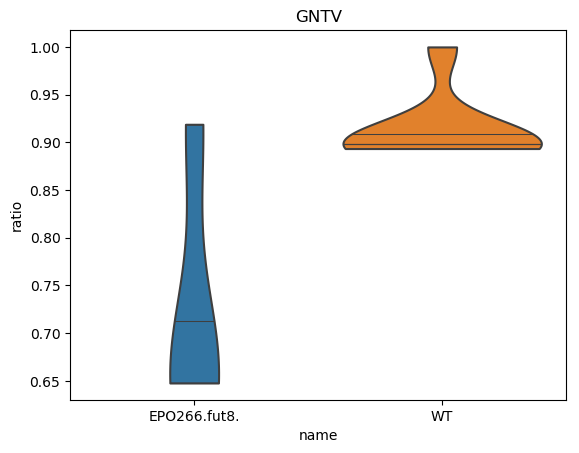

In [359]:
fut_ratio_dict={}
temp_seleced_colmuns=['EPO266.fut8.','WT']
for a_enzyme in set(list(origin_intermediate_network.re_enzyme)):
    print(a_enzyme)
    if a_enzyme=='MANII':
        continue
    col_len = len(origin_intermediate_network[origin_intermediate_network.enzyme==a_enzyme].index_source)
    ratio_1 = np.zeros((col_len, 16))

    for idex,(i,j) in enumerate(zip(origin_intermediate_network[origin_intermediate_network.enzyme==a_enzyme].index_source, origin_intermediate_network[origin_intermediate_network.enzyme==a_enzyme].index_target)):
        _a = substructure_abd_table[select_col].loc[i,]
        _b = substructure_abd_table[select_col].loc[j,]
        ratio_1[idex] = _b/_a
    
    ratio_ = pd.DataFrame(ratio_1, columns=selected_name_list)
    ratio_ = ratio_[temp_seleced_colmuns].dropna()
    ratio_ = ratio_[~((ratio_[temp_seleced_colmuns[0]] ==0) & (ratio_[temp_seleced_colmuns[1]]==0))]

    ratio_.to_csv(keywords_dict['plot_output_dir']+'fut8_'+a_enzyme+'.csv')

    
    _ratio_series = []
    _name_list = []
    
    # for i in 
    for idex, i in enumerate(temp_seleced_colmuns):
        _temp_series = ratio_[i] 
        _ratio_series.extend(_temp_series)
        _name_list+=[i]*len(_temp_series)
    #     plt.hist(_temp_series)
    #     plt.title(i)
    #     plt.show()
    # for i in selected_name_list:

    # box_percentile = list(glycan_box_percetile)
    # box_percentile.extend(list(glysub_box_percetile))
    # # akk_series
    a_table = pd.DataFrame(data={'ratio':_ratio_series, 'name': _name_list})
    fut_ratio_dict[a_enzyme]=a_table
    ax = sns.violinplot(x="name", y="ratio", data=a_table,cut=0, inner="stick" )
#     ax = sns.swarmplot(x="name", y="ratio", data=a_table,)
    plt.title(a_enzyme)
    plt.savefig(keywords_dict['plot_output_dir']+'fut8_'+a_enzyme+'.eps', format='eps')
    plt.show()

    # a_table


In [310]:
ratio_

,st3gal4.st3gal6,WT
0,0.942668,0.893496
1,0.785816,0.897797
3,0.942668,0.893496
4,0.785816,0.897797
5,0.785816,0.897797
8,0.785816,0.897797
9,0.815856,0.897797
12,0.815856,0.897797


B4GALT


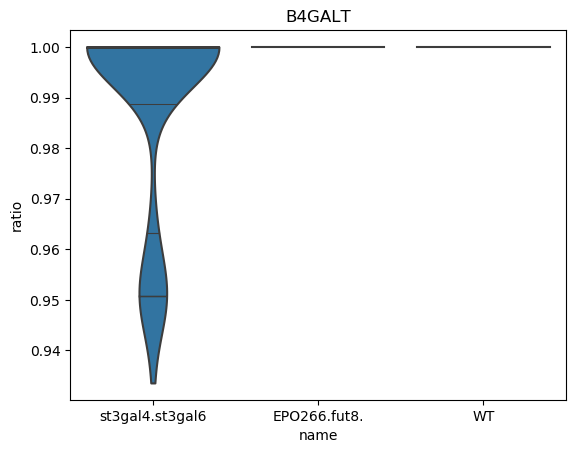

IGNT


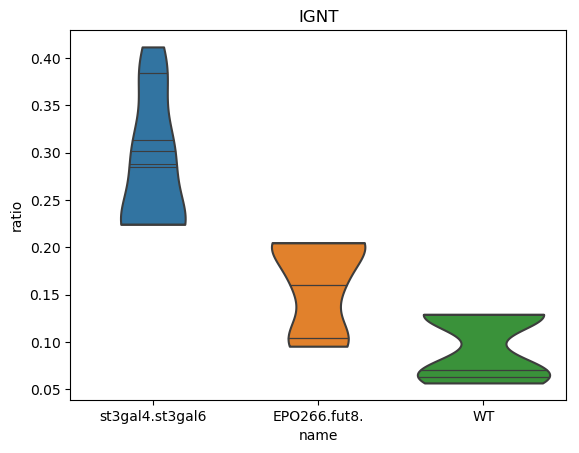

GNTII


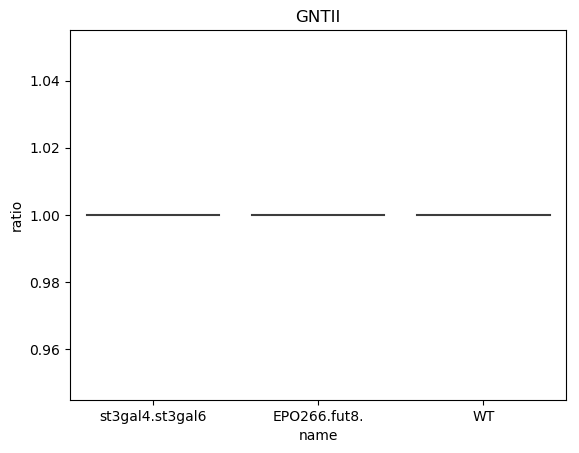

MANII
A6FUCT


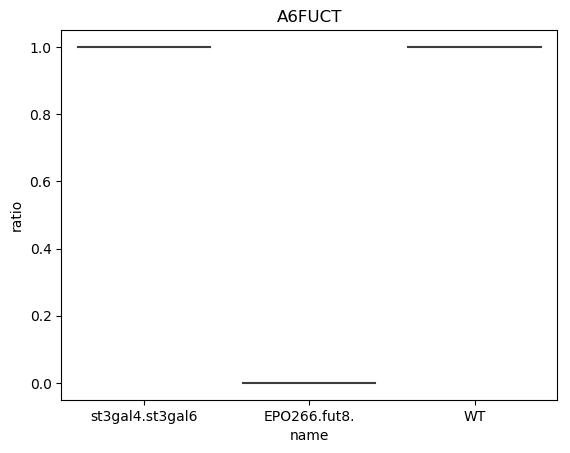

GNTIV


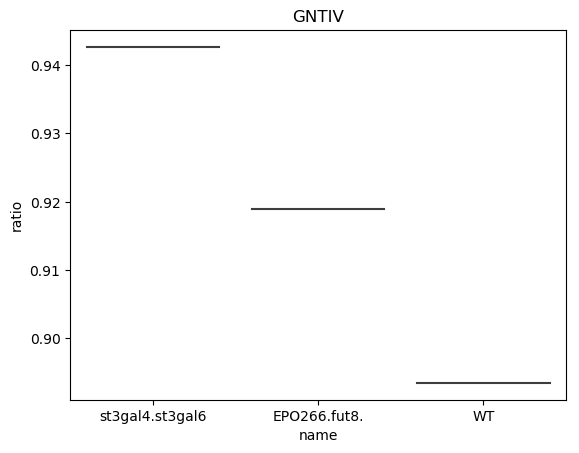

GNTIV, GNTV


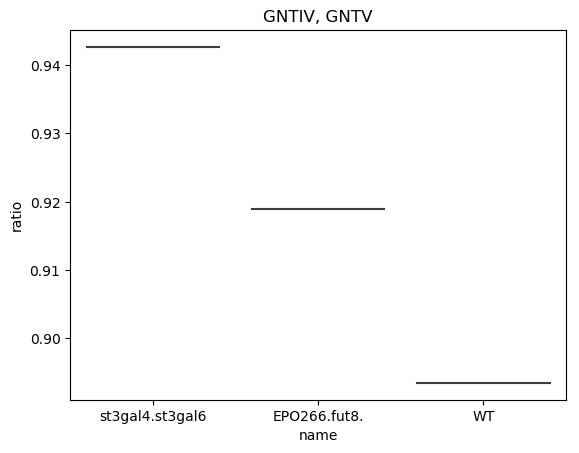

A3SIAT


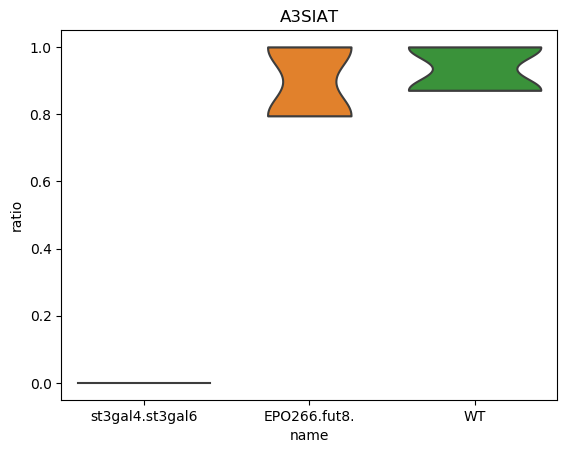

GNTV


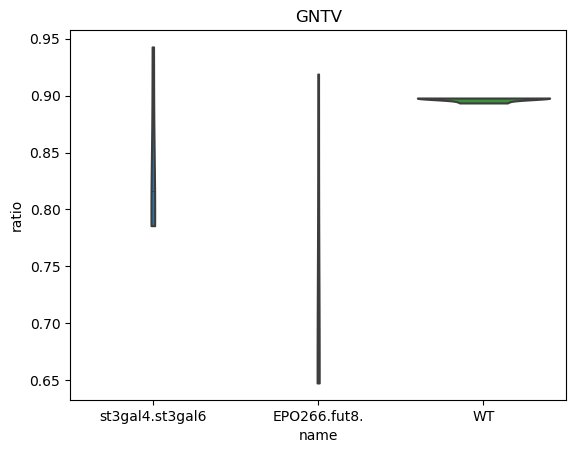

In [363]:
st3_ratio_dict={}
temp_seleced_colmuns=['st3gal4.st3gal6','EPO266.fut8.','WT']
for a_enzyme in set(list(origin_intermediate_network.re_enzyme)):
    print(a_enzyme)
    if a_enzyme=='MANII':
        continue
    col_len = len(origin_intermediate_network[origin_intermediate_network.enzyme==a_enzyme].index_source)
    ratio_1 = np.zeros((col_len, 16))

    for idex,(i,j) in enumerate(zip(origin_intermediate_network[origin_intermediate_network.enzyme==a_enzyme].index_source, origin_intermediate_network[origin_intermediate_network.enzyme==a_enzyme].index_target)):
        _a = substructure_abd_table[select_col].loc[i,]
        _b = substructure_abd_table[select_col].loc[j,]
        ratio_1[idex] = _b/_a
    
    ratio_ = pd.DataFrame(ratio_1, columns=selected_name_list)
    ratio_ = ratio_[temp_seleced_colmuns].dropna()
    ratio_ = ratio_[~((ratio_[temp_seleced_colmuns[0]] ==0) & (ratio_[temp_seleced_colmuns[1]]==0))]
    ratio_.to_csv(keywords_dict['plot_output_dir']+'st3_'+a_enzyme+'.csv')

    _ratio_series = []
    _name_list = []
    
    # for i in 
    for idex, i in enumerate(temp_seleced_colmuns):
        _temp_series = ratio_[i] 
        _ratio_series.extend(_temp_series)
        _name_list += [i]*len(_temp_series)
    #     plt.hist(_temp_series)
    #     plt.title(i)
    #     plt.show()
    # for i in selected_name_list:

    # box_percentile = list(glycan_box_percetile)
    # box_percentile.extend(list(glysub_box_percetile))
    # # akk_series
    a_table = pd.DataFrame(data={'ratio':_ratio_series, 'name': _name_list})
    fut_ratio_dict[a_enzyme] = a_table
    figsize=(5, 5)

    ax = sns.violinplot(x="name", y="ratio", data=a_table, cut=0, inner="stick")
#     ax = sns.swarmplot(x="name", y="ratio", data=a_table,)
#     ax = sns.stripplot(x="name", y="ratio", data=a_table, color="orange", jitter=0.2, size=2.5)

    plt.title(a_enzyme)
    plt.savefig(keywords_dict['plot_output_dir']+'st3_'+a_enzyme+'.eps', format='eps')
    plt.show()

    # a_table


In [118]:
ratio_1[200]

array([0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0.])

In [24]:
# aa = dict(origin_intermediate_network)
edge_source = list(origin_intermediate_network.index_source)
edge_target = list(origin_intermediate_network.index_target)
enzyme_list = list(origin_intermediate_network.enzyme)

enzyme_dict = {}
for idex,i in enumerate(zip(edge_source, edge_target)):
    enzyme_dict[','.join([str(i[0]), str(i[1])])] = enzyme_list[idex]
enzyme_dict

{'77,120': 'A6FUCT',
 '77,104': 'B4GALT',
 '77,114': 'GNTIV',
 '77,115': 'GNTII',
 '120,167': 'B4GALT',
 '120,184': 'GNTIV',
 '120,168': 'GNTII',
 '104,149': 'A3SIAT, A6SIAT',
 '104,173': 'IGNT',
 '114,184': 'A6FUCT',
 '114,150': 'B4GALT',
 '114,163': 'GNTII',
 '115,168': 'A6FUCT',
 '115,151': 'B4GALT',
 '115,163': 'GNTIV, GNTV',
 '136,92': 'MANII',
 '136,202': 'A6FUCT',
 '167,256': 'A3SIAT, A6SIAT',
 '167,231': 'IGNT',
 '184,249': 'B4GALT',
 '184,254': 'GNTII',
 '168,232': 'B4GALT',
 '168,254': 'GNTIV, GNTV',
 '150,213': 'A3SIAT, A6SIAT',
 '150,212': 'B4GALT',
 '150,252': 'IGNT',
 '151,214': 'A3SIAT, A6SIAT',
 '151,216': 'B4GALT',
 '151,217': 'GNTV',
 '151,238': 'IGNT',
 '163,254': 'A6FUCT',
 '163,215': 'B4GALT',
 '163,217': 'B4GALT',
 '163,227': 'GNTV',
 '173,237': 'B4GALT',
 '213,287': 'B4GALT',
 '214,288': 'B4GALT',
 '214,303': 'GNTV',
 '249,344': 'A3SIAT, A6SIAT',
 '249,328': 'B4GALT',
 '249,337': 'IGNT',
 '232,343': 'A3SIAT, A6SIAT',
 '232,316': 'B4GALT',
 '232,336': 'GNTV',
 '23

# N.3 overlap substructure network with intermediate network
# N.4 also highlight the counts

In [355]:
node_attri_in_motif = []
for i in range(len(_substructure_lab.substructure_vec)):
    if i in mod_nodes:
        if not i in map_unspecific_to_origin:
            print('?',i)
        node_attri_in_motif.append('Y')
    else:
        
        node_attri_in_motif.append('N')

node_attri_in_meatbolic = []
for i in range(len(_substructure_lab.substructure_vec)):
    if i in map_unspecific_to_origin:
        node_attri_in_meatbolic.append('Y')
    else:
        if i in mod_nodes:
            print(i)
        node_attri_in_meatbolic.append('N')
        
nodes_removed=[96, 139, 140, 199, 200, 201, 282, 283, 284, 285, 390, 391, 392, 393, 394, 395, 396, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1254, 1255, 1256, 1257, 1258, 1259, 1260, 1261, 1262, 1263, 1264, 1265, 1266, 1267, 1268, 1269, 1270, 1271, 1272, 1273, 1274, 1275, 1276, 1277, 1278, 1279, 1280, 1281, 1282, 1283, 1284, 1285, 1286, 1287, 1288, 1289, 1290, 1291, 1292, 1293, 1294, 1295, 1413, 1414, 1415, 1416, 1417, 1418, 1419, 1420, 1421, 1422, 1423, 1424, 1425, 1426, 1427, 1428, 1429, 1430, 1431, 1432, 1433, 1434, 1435, 1436, 1437, 1438, 1439, 1440, 1441, 1442, 1443, 1444, 1445, 1446, 1447, 1448, 1449, 1450, 1451, 1452, 1536, 1537, 1538, 1539, 1540, 1541, 1542, 1543, 1544, 1545, 1546, 1547, 1548, 1549, 1550, 1551, 1552, 1553, 1554, 1555, 1556, 1557, 1558, 1559, 1560, 1561, 1562, 1563, 1564, 1565, 1566, 1567, 1619, 1620, 1621, 1622, 1623, 1624, 1625, 1626, 1627, 1628, 1629, 1630, 1631, 1632, 1633, 1634, 1635, 1636, 1637, 1638, 1639, 1668, 1669, 1670, 1671, 1672, 1673, 1674, 1675, 1676, 1677, 1678, 1691, 1692, 1693, 1694, 1699]

nodes_should_keep =[i for i in _substructure_lab.substructure_with_core_list if i not in nodes_removed]
nodes_should_keep =[i for i in nodes_should_keep if i in map_unspecific_to_origin] 
print(len(nodes_should_keep))
nodes_count = [0]*len(_substructure_lab.substructure_vec)
for i in count_time:
    for jdex,j in enumerate(nodes_should_keep):
        if len(_substructure_lab.substructure_vec[j].index) == len(glycan_dict[i].index):
            if subtree_of(glycan_dict[i], _substructure_lab.substructure_vec[j], exact=False)==1 and \
                subtree_of(_substructure_lab.substructure_vec[j], glycan_dict[i], exact=False)==1:
                nodes_count[j]=count_time[i]
#                 print(i, j, count_time[i])

motif_counts_expand = [0]*len(node_attri_in_motif)
for idex,i in enumerate(node_attri_in_motif):
    if i=='Y':
        motif_counts_expand[idex]=substructure_counts_expand[idex]
    
pd.DataFrame(data={'in_motif':node_attri_in_motif, 
                   'intermedia': node_attri_in_meatbolic,
                  'count_time':nodes_count,
                  'substruc_counts':substructure_counts_expand,
                  'motif_counts':motif_counts_expand}).to_csv('/Users/apple/PycharmProjects/GlyCompare/example_notebook/intermedia_node_attri.csv',)

? 84
84
511


In [354]:
node_attri_in_motif.count('Y')

155

In [339]:
len(nodes_count)

1701

In [26]:
len(map_unspecific_to_origin)
len(nodes_count)

1701

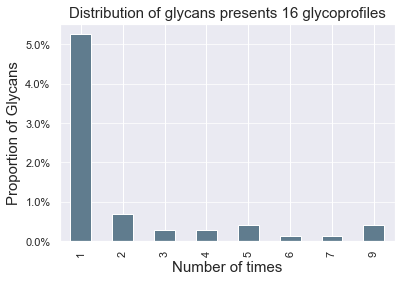

In [27]:
_nodes_count = [i for idex,i in enumerate(nodes_count) if idex in nodes_should_keep]
commutes = pd.DataFrame({"counts":[i for i in _nodes_count if i>0]})
commutes = commutes['counts'].value_counts()
commutes = commutes.sort_index(axis=0)/len(_substructure_lab.substructure_with_core_list)
ax=commutes.plot('bar', color='#607c8e')
# commutes.plot.hist(grid=True, rwidth=0.9,
# #                    color='#607c8e'， )
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.1%}'.format(x) for x in vals])
plt.title('Distribution of glycans presents 16 glycoprofiles', size=15)
plt.xlabel('Number of times', size=15)
plt.ylabel('Proportion of Glycans', size=15)

plt.grid(axis='y', alpha=0.75)
plt.savefig(keywords_dict['plot_output_dir']+'glycan_counts_distribution.svg')



In [28]:
# how many nodes existed in one glycoprofile 

# whole glycans number 51
print(len(pd_table[pd_table.columns[0]]))
# whole intermediate network
print(len(map_unspecific_to_origin))
# for boxplot glycan percentile
glycan_box_percetile = []
for i in pd_table.columns:
    glycan_in_profile = len(pd_table[i])-list(pd_table[i]).count(0)
    glycan_box_percetile.append(glycan_in_profile/len(nodes_should_keep))
glycan_box_percetile


51
575


[0.005870841487279843,
 0.007827788649706457,
 0.0136986301369863,
 0.0136986301369863,
 0.007827788649706457,
 0.007827788649706457,
 0.007827788649706457,
 0.01761252446183953,
 0.023483365949119372,
 0.021526418786692758,
 0.019569471624266144,
 0.01761252446183953,
 0.0136986301369863,
 0.005870841487279843,
 0.011741682974559686,
 0.011741682974559686]

In [29]:
glysub_box_percetile = []
for i in substructure_abd_table[select_col].columns:
    _temp_abd_list = list(substructure_abd_table[substructure_abd_table.index.isin(nodes_should_keep)][i])
    glysub_in_profile = len(_temp_abd_list)-list(_temp_abd_list).count(0)
    glysub_box_percetile.append(glysub_in_profile/len(nodes_should_keep))

glysub_box_percetile


[0.005870841487279843,
 0.0821917808219178,
 0.4774951076320939,
 0.10567514677103718,
 0.03522504892367906,
 0.0821917808219178,
 0.03522504892367906,
 0.2974559686888454,
 0.6105675146771037,
 0.9549902152641878,
 0.9549902152641878,
 0.9549902152641878,
 0.9549902152641878,
 0.31702544031311153,
 0.4500978473581213,
 0.31702544031311153]

In [30]:
motif_box_percetile = []
for i in substructure_abd_table[select_col].columns:
    _mode_node = [i for i in mod_nodes if i in nodes_should_keep]
    _temp_abd_list = list(substructure_abd_table[substructure_abd_table.index.isin(_mode_node)][i])
    _ha = (len(_temp_abd_list)-list(_temp_abd_list).count(0))
    motif_box_percetile.append(_ha/len(nodes_should_keep))

motif_box_percetile


[0.005870841487279843,
 0.06262230919765166,
 0.14481409001956946,
 0.04500978473581213,
 0.03522504892367906,
 0.06262230919765166,
 0.03522504892367906,
 0.12524461839530332,
 0.2700587084148728,
 0.2896281800391389,
 0.2896281800391389,
 0.2896281800391389,
 0.2896281800391389,
 0.1761252446183953,
 0.18786692759295498,
 0.1761252446183953]

In [341]:
substructure_abd_table_core = substructure_abd_table[substructure_abd_table.index.isin(nodes_should_keep)]
table_array = np.zeros(substructure_abd_table_core[select_col].shape)
# for i in table_a.rray
# table_
for idex,i in enumerate(substructure_abd_table_core[select_col].columns):
    for jdex,j in enumerate(substructure_abd_table_core[select_col].index):
        table_array[jdex, idex] = 1 if substructure_abd_table_core.loc[j,i]>0 else 0
substructure_counts = []
for i in table_array:
    substructure_counts.append(sum(i)) 
substructure_counts


[15.0,
 1.0,
 15.0,
 11.0,
 14.0,
 14.0,
 1.0,
 13.0,
 11.0,
 14.0,
 10.0,
 14.0,
 13.0,
 13.0,
 10.0,
 1.0,
 11.0,
 10.0,
 12.0,
 10.0,
 14.0,
 10.0,
 7.0,
 12.0,
 13.0,
 13.0,
 12.0,
 10.0,
 11.0,
 9.0,
 12.0,
 10.0,
 12.0,
 10.0,
 9.0,
 10.0,
 9.0,
 7.0,
 12.0,
 11.0,
 13.0,
 8.0,
 12.0,
 12.0,
 10.0,
 11.0,
 9.0,
 9.0,
 10.0,
 10.0,
 6.0,
 11.0,
 9.0,
 11.0,
 11.0,
 9.0,
 12.0,
 9.0,
 9.0,
 10.0,
 10.0,
 7.0,
 6.0,
 7.0,
 8.0,
 7.0,
 11.0,
 11.0,
 8.0,
 12.0,
 1.0,
 9.0,
 9.0,
 10.0,
 10.0,
 10.0,
 6.0,
 9.0,
 7.0,
 11.0,
 9.0,
 8.0,
 8.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 11.0,
 10.0,
 10.0,
 9.0,
 9.0,
 9.0,
 6.0,
 6.0,
 9.0,
 7.0,
 7.0,
 8.0,
 7.0,
 11.0,
 1.0,
 8.0,
 1.0,
 9.0,
 10.0,
 6.0,
 6.0,
 9.0,
 9.0,
 7.0,
 7.0,
 6.0,
 8.0,
 8.0,
 11.0,
 8.0,
 9.0,
 5.0,
 10.0,
 10.0,
 9.0,
 9.0,
 10.0,
 9.0,
 10.0,
 10.0,
 7.0,
 10.0,
 10.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 6.0,
 7.0,
 9.0,
 9.0,
 6.0,
 6.0,
 6.0,
 6.0,
 7.0,
 7.0,
 8.0,
 7.0,
 1.0,
 1.0,
 1.0,
 6.0,
 9.0,
 7.0,
 7.0,


In [349]:
substructure_abd_table_core[select_col].index

Int64Index([  77,   92,  104,  114,  115,  120,  136,  149,  150,  151,
            ...
            1686, 1687, 1688, 1689, 1690, 1695, 1696, 1697, 1698, 1700],
           dtype='int64', length=511)

In [350]:
substructure_counts_expand = [0]*len(nodes_count)
for idex,i in enumerate(list(substructure_abd_table_core[select_col].index)):
    substructure_counts_expand[i] = substructure_counts[idex]

In [32]:
substructure_abd_table_core = substructure_abd_table[substructure_abd_table.index.isin(mod_nodes)]
table_array = np.zeros(substructure_abd_table_core[select_col].shape)
# for i in table_a.rray
# table_
for idex,i in enumerate(substructure_abd_table_core[select_col].columns):
    for jdex,j in enumerate(substructure_abd_table_core[select_col].index):
        table_array[jdex, idex] = 1 if substructure_abd_table_core.loc[j,i]>0 else 0
motif_counts = []
for i in table_array:
    motif_counts.append(sum(i))
motif_counts

[15.0,
 15.0,
 1.0,
 15.0,
 11.0,
 14.0,
 14.0,
 1.0,
 13.0,
 11.0,
 14.0,
 10.0,
 14.0,
 13.0,
 13.0,
 10.0,
 1.0,
 11.0,
 10.0,
 12.0,
 10.0,
 14.0,
 10.0,
 7.0,
 12.0,
 13.0,
 13.0,
 10.0,
 9.0,
 12.0,
 10.0,
 12.0,
 10.0,
 9.0,
 10.0,
 9.0,
 7.0,
 12.0,
 13.0,
 12.0,
 10.0,
 11.0,
 9.0,
 9.0,
 6.0,
 11.0,
 9.0,
 11.0,
 9.0,
 12.0,
 10.0,
 10.0,
 7.0,
 6.0,
 11.0,
 12.0,
 9.0,
 9.0,
 10.0,
 6.0,
 11.0,
 9.0,
 8.0,
 8.0,
 11.0,
 10.0,
 9.0,
 9.0,
 6.0,
 9.0,
 7.0,
 11.0,
 9.0,
 10.0,
 6.0,
 8.0,
 11.0,
 9.0,
 5.0,
 10.0,
 10.0,
 10.0,
 9.0,
 9.0,
 6.0,
 6.0,
 6.0,
 7.0,
 8.0,
 6.0,
 9.0,
 8.0,
 8.0,
 5.0,
 8.0,
 10.0,
 10.0,
 10.0,
 9.0,
 9.0,
 6.0,
 9.0,
 6.0,
 6.0,
 7.0,
 1.0,
 7.0,
 6.0,
 8.0,
 8.0,
 5.0,
 5.0,
 5.0,
 9.0,
 9.0,
 9.0,
 6.0,
 6.0,
 6.0,
 6.0,
 5.0,
 8.0,
 5.0,
 5.0,
 9.0,
 7.0,
 7.0,
 6.0,
 1.0,
 5.0,
 5.0,
 5.0,
 9.0,
 6.0,
 8.0,
 6.0,
 5.0,
 6.0,
 8.0,
 6.0,
 6.0,
 1.0,
 6.0,
 6.0,
 5.0,
 6.0,
 5.0,
 5.0,
 6.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 4.0]

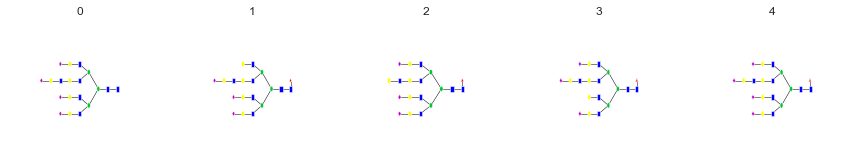

In [252]:
plot_glycan_utilities.plot_glycan_list([_substructure_lab.substructure_vec[i] for i in [1641,1642,1643,1644,1679]])

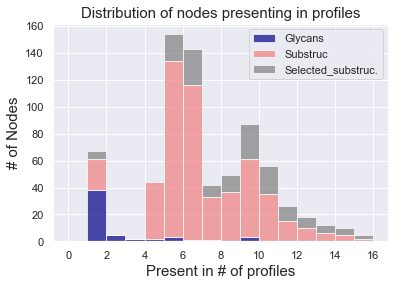

In [266]:
bins = np.linspace(0, 16, 17)
__nodes_count = [i for i in _nodes_count if i>0]
plt.hist([__nodes_count, substructure_counts,motif_counts,], bins, histtype='bar',stacked=True, 
         color=['darkblue', 'lightcoral','grey', ], alpha=0.7, )#alpha=0.7,label='Glyco-motif',color='gray')
# plt.hist(__nodes_count,bins,alpha=0.7, label='Glycan',)
# plt.hist(substructure_counts,bins,alpha=0.55,  label='Substruc.')

# sns.distplot(motif_counts, hist=True, kde=False, 
#              bins=bins, color = 'grey', 
#              norm_hist=False,
#              hist_kws={'edgecolor':'grey'},
#              kde_kws={'linewidth': 3},
#             label='Glyco-motif')

# sns.distplot(substructure_counts, hist=True, kde=False, 
#              bins=bins, color = 'lightcoral', 
#              hist_kws={'edgecolor':'red'},
#              norm_hist=False,
#              kde_kws={'linewidth': 3},
#             label='Substruc.')
# sns.distplot(__nodes_count, hist=True, kde=False, 
#              bins=bins, color = 'darkblue', 
#              hist_kws={'edgecolor':'darkblue'},
#              norm_hist=False,
#              kde_kws={'linewidth': 3},
#             label='Glycan')
plt.legend(['Glycans', 'Substruc','Selected_substruc.'], loc='upper right')
plt.ylabel('# of Nodes', size=15)
plt.xlabel('Present in # of profiles', size=15)
plt.title('Distribution of nodes presenting in profiles', size=15)
plt.savefig(keywords_dict['plot_output_dir']+'distribution_of_counts_teo_coverage.svg', format='svg')


In [273]:
# temp_series = __nodes_count[:]
# temp_series.extend(substructure_counts)
# temp_series.extend(motif_counts)
# temp_name_series=['glycan']*len(__nodes_count)+['substruc.']*len(substructure_counts)+[0]*len(motif_counts)


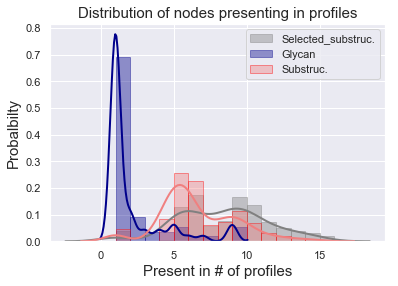

In [267]:
# temp_series = _nodes_count[:]
# temp_series.extend(substructure_counts).extend(motif_counts)
# name_series=['glycan']
# bins = np.linspace(0, 16, 17)
# plt.hist(motif_counts,bins,alpha=1,density=True,label='Glyco-motif',color='silver', )
# plt.hist(__nodes_count,bins,alpha=0.5, density=True, label='Glycan',)
# plt.hist(substructure_counts,bins,alpha=0.7, density=True, label='Substruc.')

sns.distplot(motif_counts, hist=True, kde=True, 
             bins=bins, color = 'grey', 
             norm_hist=True,
             hist_kws={'edgecolor':'grey'},
             kde_kws={'linewidth': 2},
            label='Selected_substruc.')
sns.distplot(__nodes_count, hist=True, kde=True, 
             bins=bins, color = 'darkblue', 
             hist_kws={'edgecolor':'darkblue'},
             norm_hist=True,
             kde_kws={'linewidth': 2},
            label='Glycan')
sns.distplot(substructure_counts, hist=True, kde=True, 
             bins=bins, color = 'lightcoral', 
             hist_kws={'edgecolor':'red'},
             norm_hist=True,
             kde_kws={'linewidth': 2},
            label='Substruc.')

# vals = ax.get_yticks()
# ax.set_yticklabels(['{:,.1%}'.format(x) for x in vals])
# plt.yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,],labels=['{:,.1%}'.format(x) for x in [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,]])
plt.legend(loc='upper right')
plt.ylabel('Probalbilty', size=15)
plt.xlabel('Present in # of profiles', size=15)
plt.title('Distribution of nodes presenting in profiles', size=15)
plt.savefig(keywords_dict['plot_output_dir']+'distribution_of_counts_probability_three_coverage.svg', format='svg')


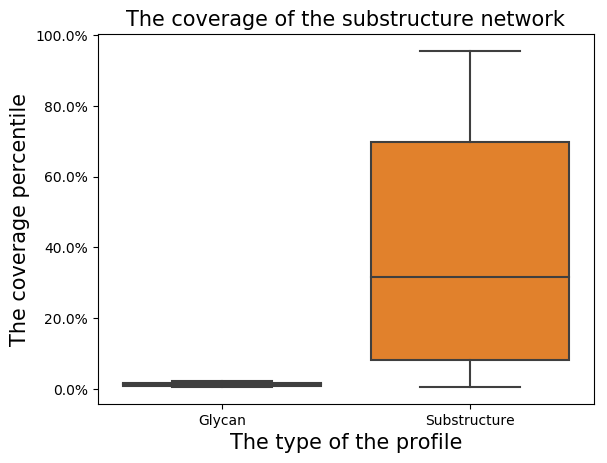

In [282]:
import importlib
importlib.reload(plt); importlib.reload(sns)
sns.reset_defaults()
box_percentile=list(glycan_box_percetile)
box_percentile.extend(list(glysub_box_percetile))
# akk_series
ax = sns.boxplot(x="type", y="nodes", data=pd.DataFrame(data={'nodes':box_percentile, 
                                                                  'type':['Glycan']*16+['Substructure']*16}), )
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.1%}'.format(x) for x in vals])
ax.set_xlabel('The type of the profile', size=15)
ax.set_ylabel('The coverage percentile', size=15)
ax.set_title('The coverage of the substructure network', size=15)
plt.savefig(keywords_dict['plot_output_dir']+'two_coverage.svg', format='svg')


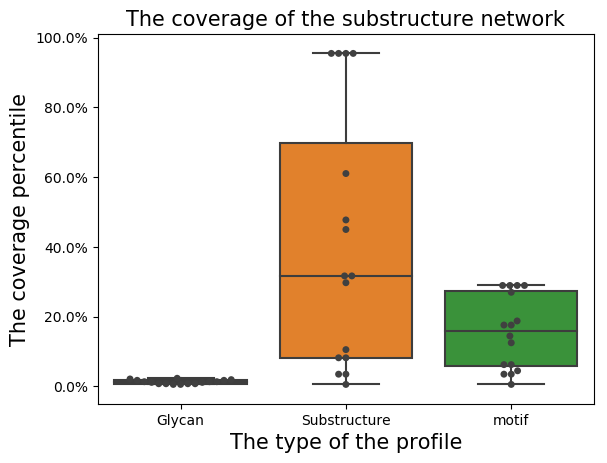

In [285]:
box_percentile=list(glycan_box_percetile)
box_percentile.extend(list(glysub_box_percetile))
box_percentile.extend(list(motif_box_percetile))
# akk_series
ax = sns.boxplot(x="type", y="nodes", 
                 data=pd.DataFrame(data={'nodes':box_percentile, 'type':['Glycan']*16+['Substructure']*16+['motif']*16}))
ax = sns.swarmplot(x="type", y="nodes", 
                 data=pd.DataFrame(data={'nodes':box_percentile, 'type':['Glycan']*16+['Substructure']*16+['motif']*16}),
                  color=".25")

vals = ax.get_yticks()
ax.set_yticklabels(['{:,.1%}'.format(x) for x in vals])
ax.set_xlabel('The type of the profile', size=15)
ax.set_ylabel('The coverage percentile', size=15)
ax.set_title('The coverage of the substructure network', size=15)
plt.savefig(keywords_dict['plot_output_dir']+'three_coverage.svg', format='svg')


In [37]:
substructure_abd_table[select_col]

,30,25,34,21,22,5,20,18,6,7,8,1,9,28,3,4
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.000000,1.000000,1.000000,0.000000,0.985607,0.973432,0.952270,0.000000,0.346590,0.984724,1.000000,0.983567,1.000000,1.000000,0.973339,0.968353
2,0.000000,1.000000,1.000000,0.989516,0.985607,1.000000,0.986382,1.000000,0.405467,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,1.000000,1.000000,0.980397,0.914952,1.000000,1.000000,1.000000,0.939290,0.961190,0.998558,0.996720,0.992653,0.994765,1.000000,0.993354,1.000000
5,0.481719,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
6,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
7,0.000000,1.000000,1.000000,0.000000,0.985607,0.973432,0.952270,0.000000,0.346590,0.984724,1.000000,0.983567,1.000000,1.000000,0.973339,0.968353
8,0.000000,1.000000,1.000000,0.989516,0.985607,1.000000,0.986382,1.000000,0.405467,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
glycan_substructure_coverage_list = []
glycan_intermediate_coverage_list = []
substructure_coverage_list = []
intermediate_coverage_list = []
for _col in substructure_abd_table[select_col].columns:
#     glycan_substructure_coverage_list.append(list(_col).count(1)/len(_substructure_lab.substructure_with_core_list))
#     glycan_intermediate_coverage_list.append(list(_col).count(1)/len(a_list))
    vec_exist = list(substructure_abd_table[select_col][_col])
#         print(count)
#     print(vec_exist)
    substructure_coverage_list.append((len(vec_exist)-vec_exist.count(0))/len(vec_exist))
    vec_exist = [i for idex, i in enumerate(vec_exist) if idex in map_unspecific_to_origin]
    intermediate_coverage_list.append((len(vec_exist)-vec_exist.count(0))/len(vec_exist))
    

In [39]:
print(substructure_coverage_list)
print(intermediate_coverage_list)

[0.021164021164021163, 0.12815990593768373, 0.6131687242798354, 0.0975896531452087, 0.04350382128159906, 0.08406819517930629, 0.04350382128159906, 0.2827748383303939, 0.4879482657260435, 0.8089359200470312, 0.8089359200470312, 0.8089359200470312, 0.8089359200470312, 0.2692533803644915, 0.4209288653733098, 0.2692533803644915]
[0.0052173913043478265, 0.07304347826086957, 0.42434782608695654, 0.09391304347826086, 0.03130434782608696, 0.07304347826086957, 0.03130434782608696, 0.2643478260869565, 0.542608695652174, 0.8486956521739131, 0.8486956521739131, 0.8486956521739131, 0.8486956521739131, 0.2817391304347826, 0.4, 0.2817391304347826]


(RES 1b:b-dglc-HEX-1:5 2s:n-acetyl LIN 1:1d(2+1)2n: id=1  x=3.061616997868383e-17 mod=0,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a227cbeb8>)

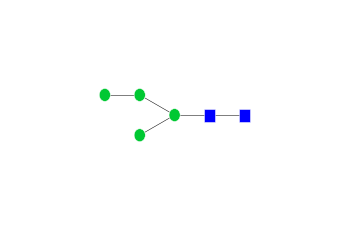

In [40]:
plot_glycan_utilities.plot_glycan(_substructure_lab.substructure_vec[92])

In [41]:
_tree_edge = _substructure_lab.dep_tree_to_edge_list(_substructure_lab.substructure_dep_tree_core)

enzyme_list = []
for i in _tree_edge:
    if len(origin_intermediate_network[(origin_intermediate_network.index_source==i[0] )& (origin_intermediate_network.index_target==i[1])].enzyme)!=0:
        enzyme_list.append(list(origin_intermediate_network[(origin_intermediate_network.index_source==i[0] )& (origin_intermediate_network.index_target==i[1])].enzyme)[0])
    else:
        enzyme_list.append('N')
aak = pd.DataFrame(data={'start':[i[0] for i in _tree_edge], 
                   'end':[i[1] for i in _tree_edge], 
                   'edge_list':enzyme_list})
aak.to_csv('/Users/apple/PycharmProjects/GlyCompare/example_notebook/intermedia_edge.csv')
# get node list

# seperate the substructure network based on the intermediate network

In [40]:
count_time


{'G60415BS': 1,
 'G49721VX': 1,
 '1754.1': 1,
 'G07483YN': 2,
 'G12398HZ': 1,
 'G39439UR': 1,
 '2401.1': 1,
 '2605.1': 1,
 '2967.1': 1,
 '3416.2': 1,
 'G39764AC': 1,
 'G39813YP': 1,
 'G05098FE': 1,
 'G99891PR': 1,
 'G05203UQ': 1,
 'G85809SI': 1,
 '5312.1': 1,
 'G80858MF': 4,
 'G58667NI': 2,
 'G04483SK': 9,
 'G30460NZ': 9,
 '2693.2': 1,
 'G54953LX': 1,
 '3592.1': 1,
 'G90130AG': 1,
 'G23295TF': 1,
 'G17689DH': 9,
 '3416.1': 1,
 'G10691MJ': 1,
 'G07568IR': 2,
 'G37597FW': 1,
 'G20924UR': 1,
 'G88966ZO': 1,
 'G75308SV': 1,
 '4041.1': 1,
 'G80393PG': 1,
 'G00176HZ': 1,
 'G79457WN': 1,
 'G79412GP': 1,
 'G40242TG': 1,
 '3457.1': 1,
 'G76812VG': 7,
 'G80264ZA': 1,
 'G86696LV': 5,
 '4587.1': 5,
 'G49604DB': 5,
 'G54338PJ': 6,
 '3865.1': 3,
 'G09280JF': 2,
 '5486.1': 4,
 '3055.1': 1,
 'G56516KW': 3,
 '4675.1': 2,
 'G88127MB': 1,
 '3416.3': 1}

In [335]:
substructure_counts

[15.0,
 1.0,
 15.0,
 11.0,
 14.0,
 14.0,
 1.0,
 13.0,
 11.0,
 14.0,
 10.0,
 14.0,
 13.0,
 13.0,
 10.0,
 1.0,
 11.0,
 10.0,
 12.0,
 10.0,
 14.0,
 10.0,
 7.0,
 12.0,
 13.0,
 13.0,
 12.0,
 10.0,
 11.0,
 9.0,
 12.0,
 10.0,
 12.0,
 10.0,
 9.0,
 10.0,
 9.0,
 7.0,
 12.0,
 11.0,
 13.0,
 8.0,
 12.0,
 12.0,
 10.0,
 11.0,
 9.0,
 9.0,
 10.0,
 10.0,
 6.0,
 11.0,
 9.0,
 11.0,
 11.0,
 9.0,
 12.0,
 9.0,
 9.0,
 10.0,
 10.0,
 7.0,
 6.0,
 7.0,
 8.0,
 7.0,
 11.0,
 11.0,
 8.0,
 12.0,
 1.0,
 9.0,
 9.0,
 10.0,
 10.0,
 10.0,
 6.0,
 9.0,
 7.0,
 11.0,
 9.0,
 8.0,
 8.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 11.0,
 10.0,
 10.0,
 9.0,
 9.0,
 9.0,
 6.0,
 6.0,
 9.0,
 7.0,
 7.0,
 8.0,
 7.0,
 11.0,
 1.0,
 8.0,
 1.0,
 9.0,
 10.0,
 6.0,
 6.0,
 9.0,
 9.0,
 7.0,
 7.0,
 6.0,
 8.0,
 8.0,
 11.0,
 8.0,
 9.0,
 5.0,
 10.0,
 10.0,
 9.0,
 9.0,
 10.0,
 9.0,
 10.0,
 10.0,
 7.0,
 10.0,
 10.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 6.0,
 7.0,
 9.0,
 9.0,
 6.0,
 6.0,
 6.0,
 6.0,
 7.0,
 7.0,
 8.0,
 7.0,
 1.0,
 1.0,
 1.0,
 6.0,
 9.0,
 7.0,
 7.0,


# first test drawing tree

In [41]:
# node_attri, edge_attri, mod_nodes, mod_edges, merged_weights_dict = a_node_state.nodes_dropping_pipe(drop_parellel=False, drop_diff_abund=True)

# _collapsed_edge_list, _collapsed_node, _collapsed_edge_attri = a_node_state.collapsing_potential_node()
# len(_collapsed_node)
# a_node_state.upload_network(_collapsed_edge_list, _collapsed_node)

In [12]:
# # a_new_dict = {}
# a_node_new_index_dict = {}
# for idex, i in enumerate(_collapsed_node):
#     a_node_new_index_dict[i] = idex+1


# for idex,i in enumerate([24,9,23,8,22,21,15,16,1,19,18,17,3,2,20,12,13,10,11,6,5,14,7,4]):
#     a_new_dict[idex+1] = glyco_motif_cluster_dict[i]
#     for nodes in glyco_motif_cluster_dict[i]:
#         a_node_new_index_dict[nodes] = idex-24
# a_node_new_index_dict[51] = -24

# a_node_new_index_list = list(set([a_node_new_index_dict[i] for i in a_node_new_index_dict]))
# print(sorted(a_node_new_index_list))
# cluster_edge = []
# for _in, _out in _collapsed_edge_list:
#     cluster_edge.append((a_node_new_index_dict[_in], a_node_new_index_dict[_out]))
#     print((_in, _out), cluster_edge[-1])

# # a_node_attri_dict 
# # a_new_network = {}
# # a_new_network['nodes_cluster'] = a_new_dict
# # a_new_network['edge'] = _collapsed_edge_list
# # a_new_network['edge_attr'] = _collapsed_edge_attri
# # a_new_network['all_nodes'] = _collapsed_node
# # a_new_network['nodes_attri'] = 

# # json_utility.store_json("/Users/apple/PycharmProjects/GlyCompare/example_data/paper_epo/output_data/network.json", a_new_network)

In [13]:
# a_node_new_index_dict

In [14]:
# # assigning subtree profile
# _array = np.array(substre_profile[[24,9,23,8,22,21,15,16,1,19,18,17,3,2,20,12,13,10,11,6,5,14,7,4]])
# _array_1 = np.array(substre_profile_zscore_with_baseWT1)
# _wt_dict = _array_1[-6]
# _profile_node_attri = {}
# for idex, i in enumerate(_wt_dict):
#     _profile_node_attri[idex] = i
# _profile_node_attri

In [15]:
# sorted(a_node_new_index_list)

In [16]:
# reindex_nodes={}
# new_node_list=[]
# new_edge_list=[]
# a_node_new_index_dict
# for idex,i in enumerate(sorted(a_node_new_index_list)):
# #     print(i)
#     reindex_nodes[i]=idex+1
#     new_node_list.append(idex+1)
# # print(reindex_nodes)
# for i in a_node_new_index_dict:
#     print(i, a_node_new_index_dict[i], reindex_nodes[a_node_new_index_dict[i]])
# for i,j in cluster_edge:
#     new_edge_list.append((reindex_nodes[i], reindex_nodes[j]))
    
# print(reindex_nodes)
# new_edge_list=sorted(list(set(new_edge_list)), key=lambda x:x[0])
# # new_edge_list=[i for i in new_edge_list if i[0]!=i[1]]

In [17]:
# for i in new_edge_list:
#     assert i[0] in new_node_list and i[1] in new_node_list, i

In [18]:
# pd.DataFrame(edge_list).to_csv('edge.csv')

In [19]:
# nodes_attri={}
# import numpy as np
# for i in new_node_list:
#     if i in _profile_node_attri:
#         nodes_attri[i]={'size':_profile_node_attri[i], 'incl':'Y', 'node_name':str(i)}
#     else:
#         nodes_attri[i]={'size':-0.01,'incl':'N', 'node_name':str(i)}
# pd.DataFrame(data=nodes_attri).transpose().to_csv('attribute.csv')


In [20]:
# a_node_state.upload_network(new_edge_list, new_node_list,node_attri=nodes_attri,)

# Raw clustering plot for Figure 2b
### Note: we tested this plot on different version of python. We found that the orders of rows and columns might be different from the plot in paper while the clustering hierachy structrue remain same. The reason is that the orders are automatically arranged by algorithm.
### Note: the raw clustering plot for Figure S3 and S4 are also included.

In [87]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [185]:
# motif_abd_table.columns=selected_name_list

In [153]:
# from scipy.cluster.hierarchy import linkage 
# # _list = list(motif_abd_table.columns)
# # motif_abd_table.columns=[i for i in range(len(motif_abd_table.columns))]
# col_corr_table = np.array(motif_abd_table.corr(method='pearson'))
# col_corr_table
# a_list=[]
# for idex,i in enumerate(col_corr_table):
#     for jdex in range(idex+1, len(col_corr_table)):
#         a_list.append(col_corr_table[idex][jdex])
# col_a_list=np.array(a_list)
# col_linkage = linkage(y=1-col_a_list, method='complete', optimal_ordering=False)
# dendrogram(col_linkage, 
#            distance_sort='descending',
#            labels=motif_abd_table.columns,
#            color_threshold=0.3, 
#            orientation='left', 
#            leaf_font_size=25.,)
# # dendrogram(col_linkage, labels=selected_name_list, distance_sort=)

In [154]:
# # row_corr_table = np.array(motif_abd_table.T.corr(method='euclidean'))
# # a_list=[]
# # for idex,i in enumerate(row_corr_table):
# #     for jdex in range(idex+1, len(row_corr_table)):
# #         a_list.append(row_corr_table[idex][jdex])
# # row_a_list=np.array(a_list)
# row_linkage = linkage(y=motif_abd_table, method='complete', metric='euclidean', optimal_ordering=False)

# # plt.figure(figsize=fig_size)
# # fig_size=(10, 35)
# # plt.figure(figsize=fig_size)
# # plt.title('Hierarchical Clustering Profile', fontdict={'fontsize': 25})
# # plt.xlabel('Distance', fontdict={'fontsize': 25})
# # plt.rc_context({'lines.linewidth': 4})
# # plt.ylabel('Samples', fontdict={'fontsize': 25})
# # den = scipy.cluster.hierarchy.dendrogram(g.dendrogram_row.linkage,
# #                                              # truncate_mode='lastp',show_contracted=True,p=50,
# #                                              labels=df.index,
# #                                              color_threshold=color_threshold, orientation='left', leaf_font_size=10,
# #                                              distance_sort='descending', leaf_rotation=0)
# dendrogram(row_linkage, distance_sort='descending',
# #                                              labels=profile_name,
#                                              color_threshold=0.4, orientation='left', leaf_font_size=25.,)

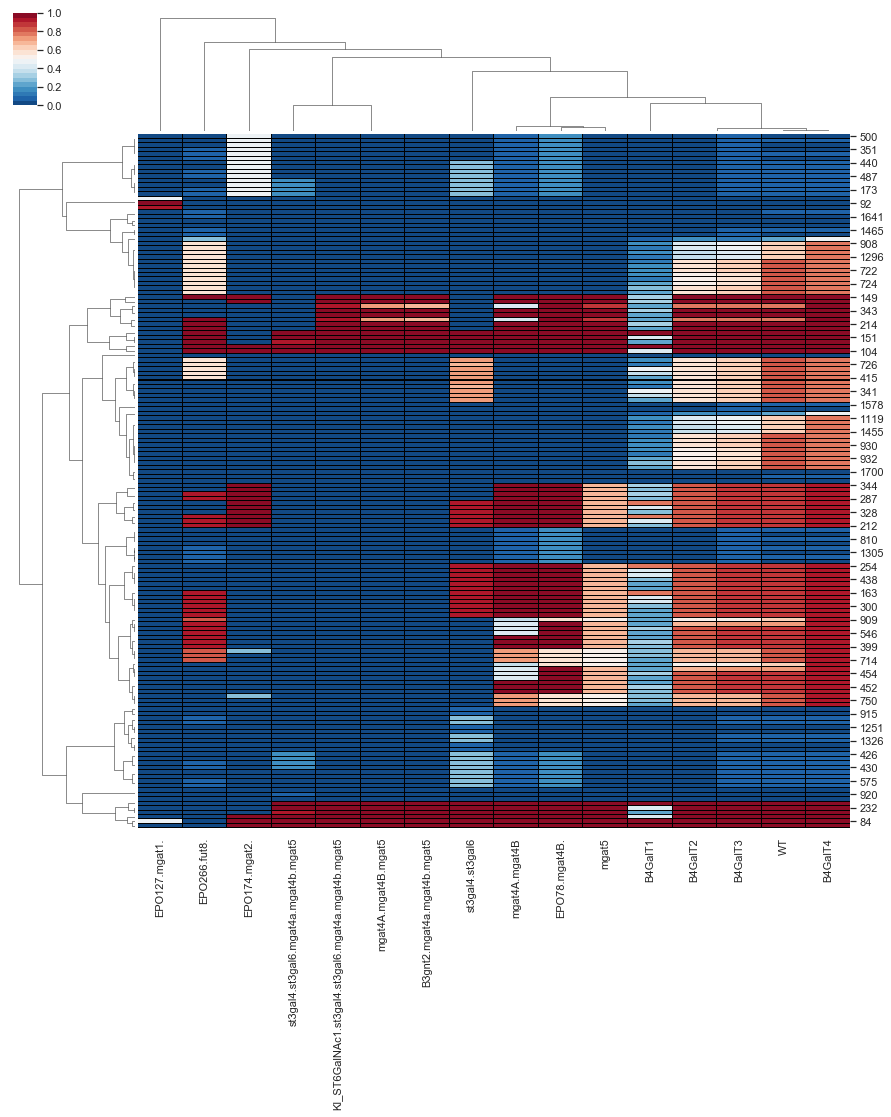

In [33]:
cmap=sns.color_palette("RdBu_r", 20)
linewidths=0.01
figsize=(15, 15)
linecolor='black'
method='complete'
# draw clustermap
cluster_grid = sns.clustermap(motif_abd_table,
#                    cmap=cmap,
#                    linewidths=linewidths,
#                    figsize=figsize,
#                    linecolor=linecolor,
#                    row_linkage=row_linkage,
#                    col_linkage=col_linkage)
                              metric="correlation",
#                               z_score=0,
                              cmap=sns.color_palette("RdBu_r", 20),
                              linewidths=0.01,
                              figsize=(15, 15),
                              linecolor='black',
                              method='complete')

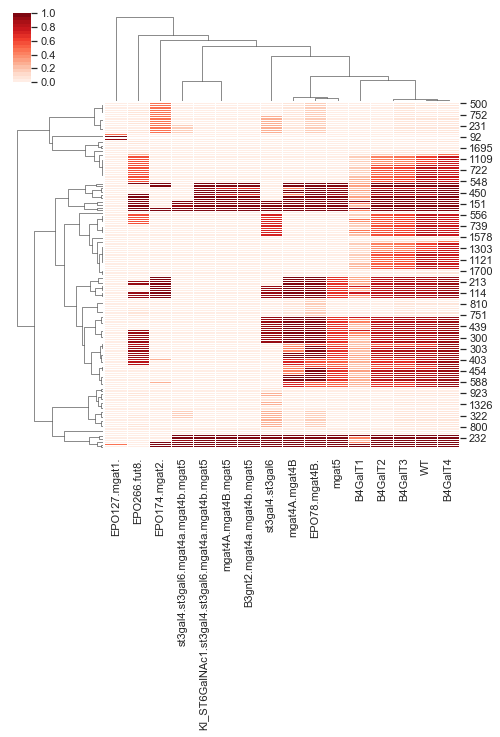

In [279]:
cluster_grid = clustering_analysis.draw_glycan_clustermap(motif_abd_table=motif_abd_table,
                                                              address=keywords_dict['plot_output_dir'] + 'pseudo_profile_clustering.svg',
                                                              metric="correlation",
                                                              cmap=sns.color_palette("Reds", 20),
                                                              linewidths=0.01,
                                                              figsize=(8, 8),
                                                              linecolor='white',
                                                              method='complete')

17


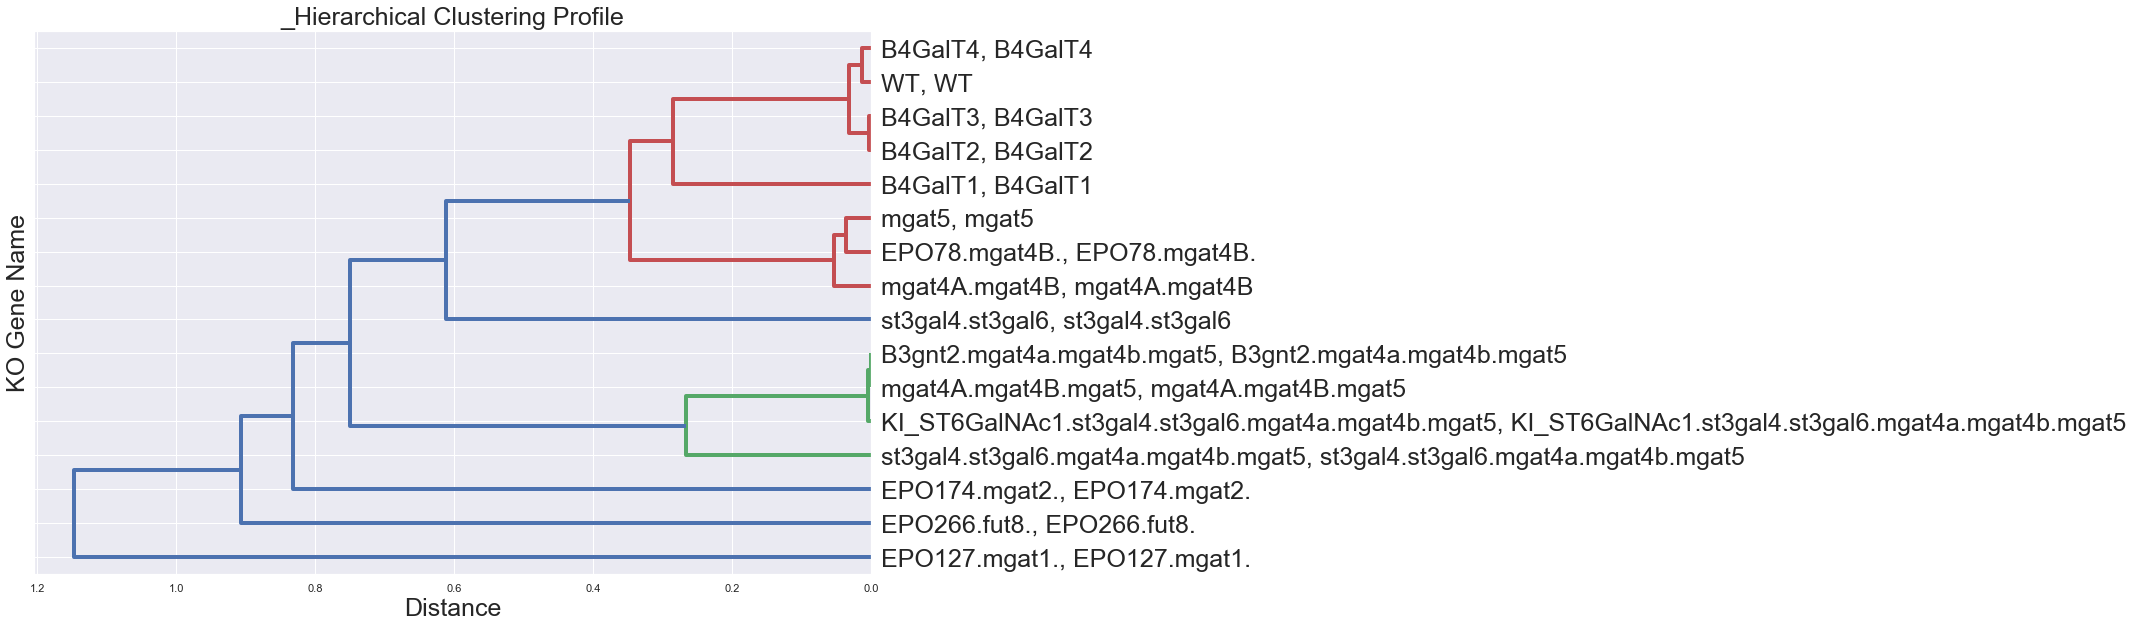

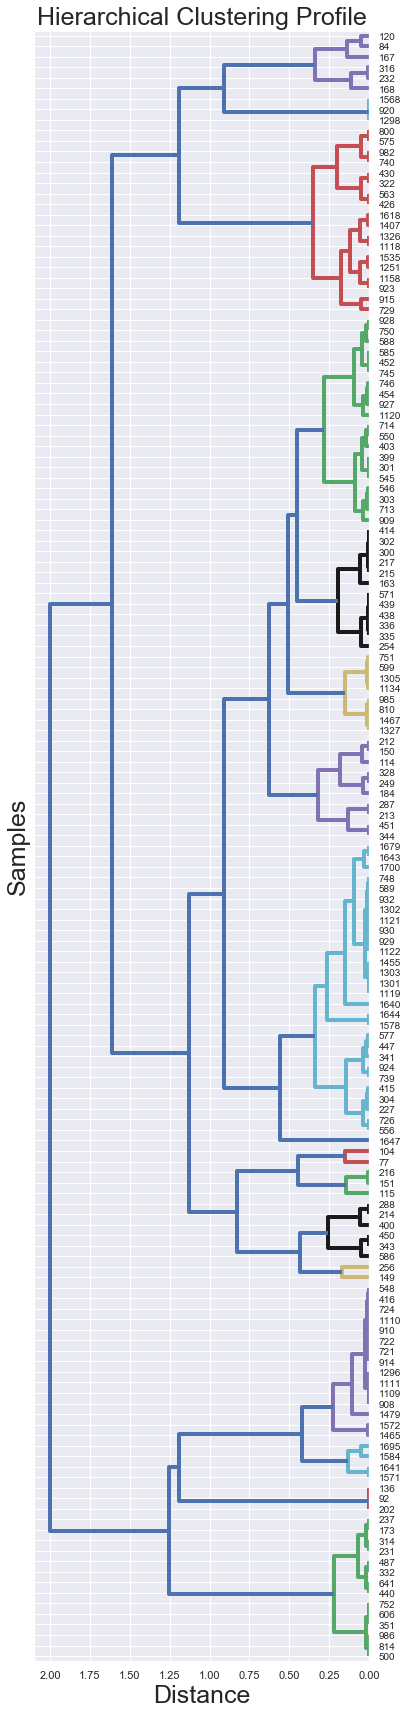

In [43]:
reload(pipeline_functions)
# glycoprofile_cluster_dict, glyco_motif_cluster_dict = pipeline_functions.clustering_analysis_pip(keywords_dict, motif_abd_table, select_profile_name=selected_name_list)

# cluster_grid = clustering_analysis.draw_glycan_clustermap(motif_abd_table=motif_abd_table,
#                                                               address=keywords_dict['plot_output_dir'] + 'pseudo_profile_clustering.svg',
#                                                               metric="correlation",
#                                                               cmap=sns.color_palette("RdBu_r", 20),
#                                                               linewidths=0.01,
#                                                               figsize=(15, 15),
#                                                               linecolor='black',
#                                                               method='complete')

glycoprofile_cluster_dict = clustering_analysis.draw_profile_cluster(g=cluster_grid,
                                                                         df=motif_abd_table,
                                                                         profile_name=selected_name_list,
                                                                         color_threshold=0.5,
                                                                         address=keywords_dict['plot_output_dir'] + 'profile_clustering.svg')

glyco_motif_cluster_dict = clustering_analysis.draw_motif_cluster(g=cluster_grid,
                                                                      df=motif_abd_table,
                                                                      color_threshold=0.4, #0.185
                                                                      address=keywords_dict['plot_output_dir'] + 'motif_cluster.svg',
                                                                      fig_size=(6, 30),
                                                                      )
print(len(glyco_motif_cluster_dict))

In [44]:
# test if transferable
test_node_list = [589, 748, 930, 932, 1119, 1121, 1122, 1301, 1302, 1303, 1455, 1640, 1643, 1679, 1700]
test_node_list = [322, 426, 430, 563, 575, 740, 800, 982]
def get_degree_span(a_sub_vec):
    _degree_list = []
    for i in a_sub_vec:
        _degree_list.append(len(i.index))
    _max = max(_degree_list)
    return _max
# get_degree_span([_substructure_lab.substructure_vec[i] for i in test_node_list ])
# undirected_edge_source=list(origin_intermediate_network.index_source)
# undirected_edge_target=list(origin_intermediate_network.index_target)

def get_all_connected(node_id, node_degree, _max, origin_intermediate_network):
#     node_degree = len(node.index)
#     print('start getting all nodes list ', node_id)
    all_node_list = [node_id]
    temp_mon_nodes = [node_id]
    for i in range(_max-node_degree):
#         print(node_degree+i)
        temp_sub_nodes = []
        for j in temp_mon_nodes:
            temp_sub_nodes.extend(list(origin_intermediate_network[origin_intermediate_network.index_source==j].index_target))
#             print( temp_sub_nodes)
        temp_sub_nodes = list(set(temp_sub_nodes))
#         print(temp_sub_nodes)
        all_node_list.extend(temp_sub_nodes[:])
#         all_node_list = list(set(all_node_list))
        temp_mon_nodes = temp_sub_nodes[:]
        del temp_sub_nodes
    
#     print('end', all_node_list)
    return all_node_list
     
def part_of_list_in_list(a_list, b_list):
    for i in a_list:
        if i in b_list:
            return True
    return False

def get_group(a_node_list, a_sub_vec, origin_intermediate_network):
    a_node_list = sorted(a_node_list)
    _max = get_degree_span([a_sub_vec[i] for i in a_node_list])
    count = 0
    node_group = [[a_node_list[0]]]
    searched_nodes = []
    while count < len(a_node_list):
        _node = a_node_list[count]
        if _node in searched_nodes:
            count+=1
            continue
            
        _new_nodes = [i for i in get_all_connected(_node, len(a_sub_vec[_node].index), _max, origin_intermediate_network) if i in a_node_list]
        _found_group = False
        
        for idex, i in enumerate(node_group):
            if part_of_list_in_list(i,_new_nodes):
#                 i.append(_node)
                i.extend(_new_nodes)
                node_group[idex] = sorted(list(set(i)))
                _found_group = True
                break
                
        if not _found_group:
#             _new_nodes.append(_node)
            node_group.append(_new_nodes[:])
#             node_group = list(set(node_group))
        searched_nodes.extend(_new_nodes)
        searched_nodes = list(set(searched_nodes))
        count+=1
    return node_group

final_cluster=[]
for i in glyco_motif_cluster_dict:
#     print('start', glyco_motif_cluster_dict[i])
    final_cluster.extend(get_group(glyco_motif_cluster_dict[i], _substructure_lab.substructure_vec, origin_intermediate_network))

final_cluster_sorted = sorted(final_cluster, key= lambda x:x[-1])
# del final_cluster_sorted[0]
final_cluster_sorted


[[84],
 [77, 104],
 [149],
 [92, 136, 202],
 [115, 151, 216],
 [256],
 [120, 168, 167, 232, 316],
 [173, 237, 351],
 [214, 288, 400],
 [403],
 [114, 150, 184, 212, 213, 249, 287, 328, 344, 451],
 [231, 314, 500],
 [163, 215, 217, 254, 300, 302, 335, 336, 414, 438, 439, 571],
 [343, 450, 586],
 [588],
 [227, 304, 415, 556, 726],
 [322, 430, 729],
 [599, 751],
 [332, 487, 606, 752],
 [301, 303, 399, 545, 546, 550, 713, 714, 909],
 [426, 563, 915],
 [810, 985],
 [440, 641, 814, 986],
 [452, 454, 585, 745, 746, 750, 927, 928, 1120],
 [575, 800, 1251],
 [1134, 1305],
 [740, 982, 1407],
 [1327, 1467],
 [923, 1158, 1535],
 [920, 1298, 1568],
 [416,
  548,
  721,
  722,
  724,
  908,
  910,
  914,
  1109,
  1110,
  1111,
  1296,
  1465,
  1479,
  1572],
 [1584],
 [1118, 1326, 1618],
 [1647],
 [1571, 1641, 1695],
 [341,
  447,
  577,
  589,
  739,
  748,
  929,
  930,
  932,
  924,
  1121,
  1122,
  1119,
  1301,
  1302,
  1303,
  1455,
  1578,
  1640,
  1643,
  1644,
  1679,
  1700]]

In [45]:
len(final_cluster_sorted)

36

[77, 104]
[149]
[92, 136, 202]
[115, 151, 216]
[256]
[120, 168, 167, 232, 316]
[173, 237, 351]
[214, 288, 400]
[403]
[114, 150, 184, 212, 213, 249, 287, 328, 344, 451]
[231, 314, 500]
[163, 215, 217, 254, 300, 302, 335, 336, 414, 438, 439, 571]
[343, 450, 586]
[588]
[227, 304, 415, 556, 726]
[322, 430, 729]
[599, 751]
[332, 487, 606, 752]
[301, 303, 399, 545, 546, 550, 713, 714, 909]
[426, 563, 915]
[810, 985]
[440, 641, 814, 986]
[452, 454, 585, 745, 746, 750, 927, 928, 1120]
[575, 800, 1251]
[1134, 1305]
[740, 982, 1407]
[1327, 1467]
[923, 1158, 1535]
[920, 1298, 1568]
[416, 548, 721, 722, 724, 908, 910, 914, 1109, 1110, 1111, 1296, 1465, 1479, 1572]
[1584]
[1118, 1326, 1618]
[1647]
[1571, 1641, 1695]
[341, 447, 577, 589, 739, 748, 929, 930, 932, 924, 1121, 1122, 1119, 1301, 1302, 1303, 1455, 1578, 1640, 1643, 1644, 1679, 1700]


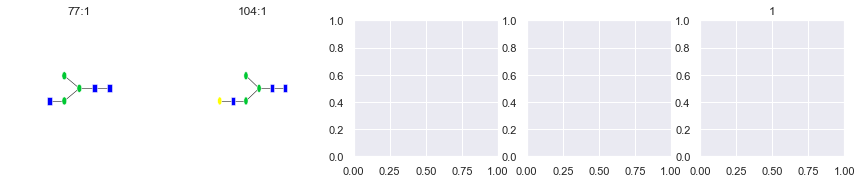

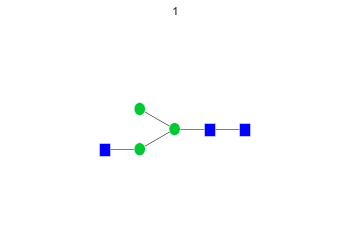

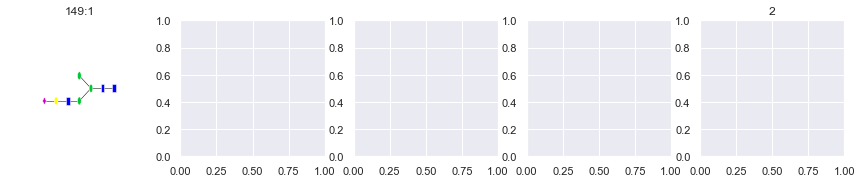

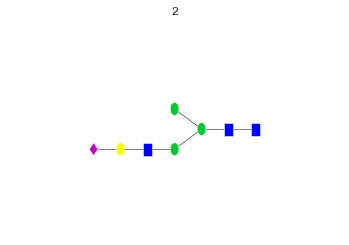

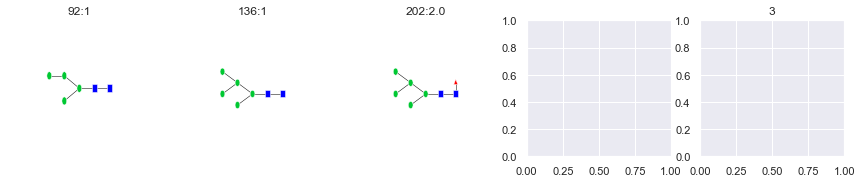

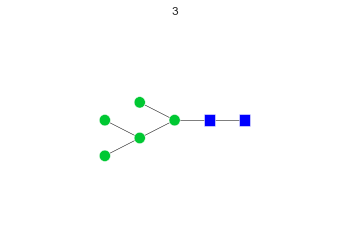

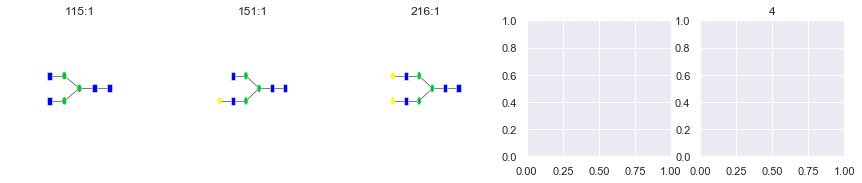

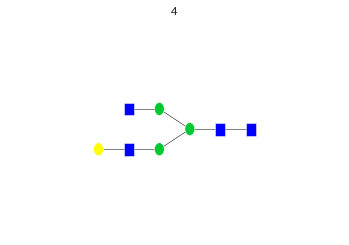

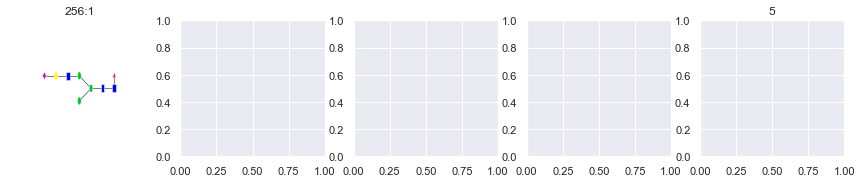

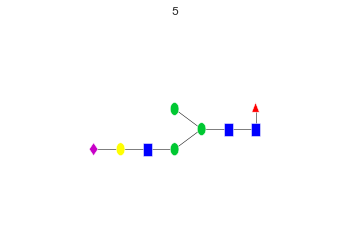

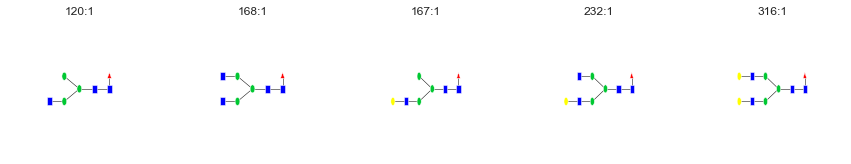

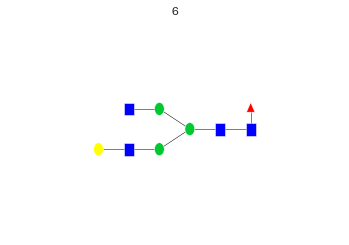

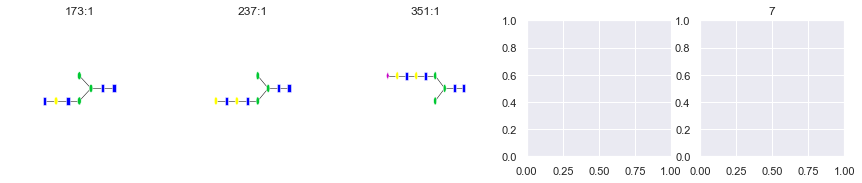

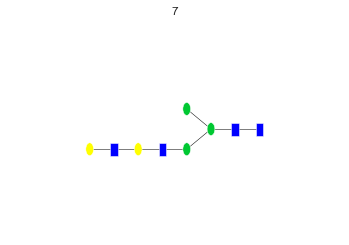

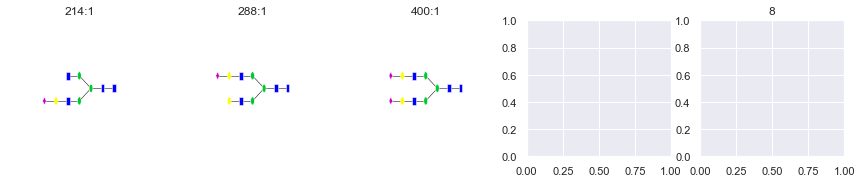

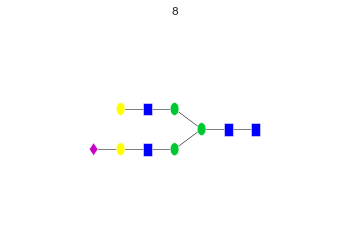

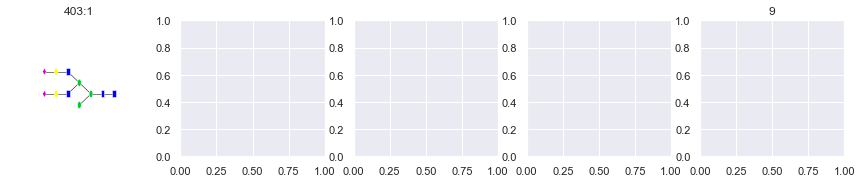

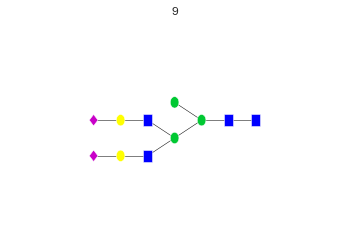

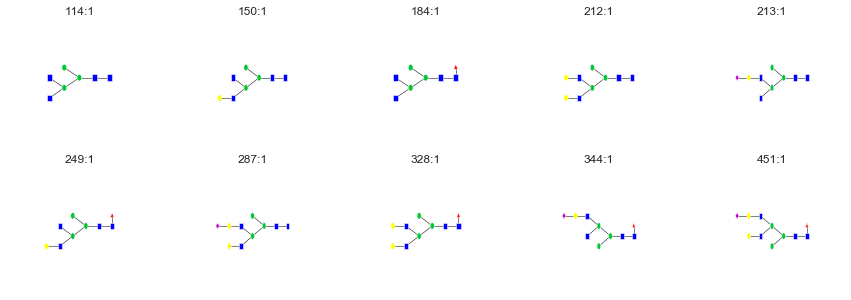

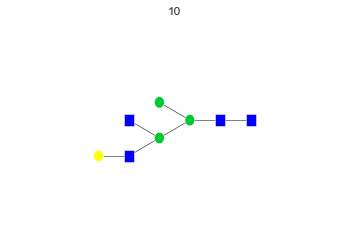

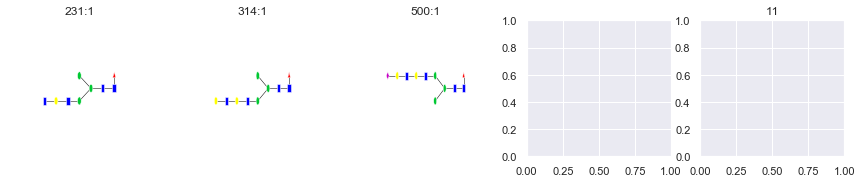

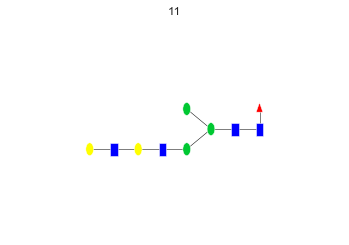

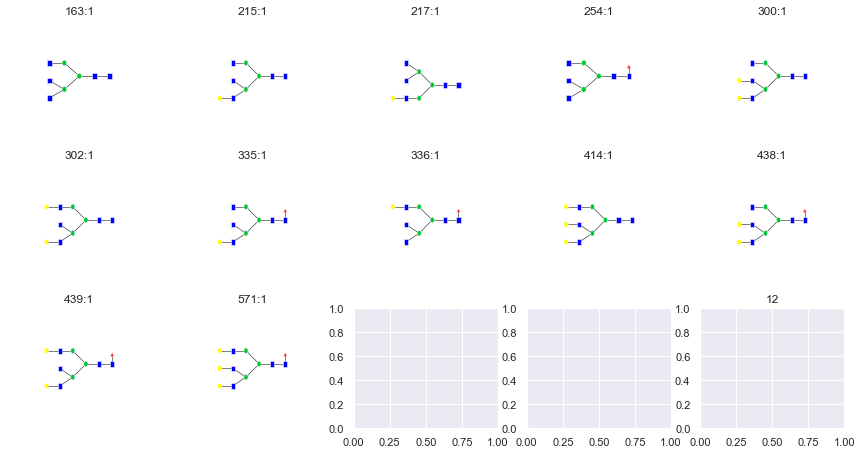

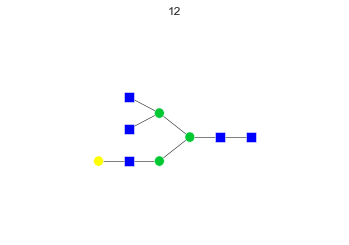

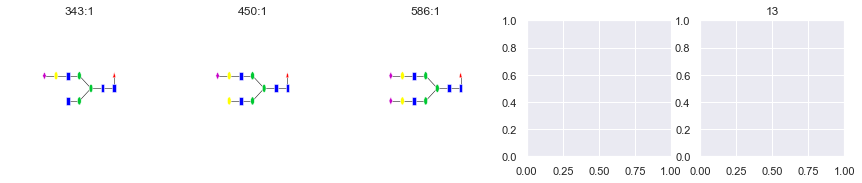

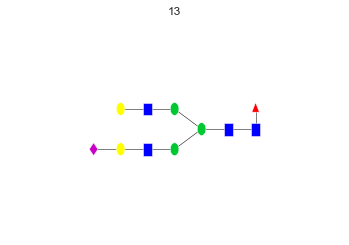

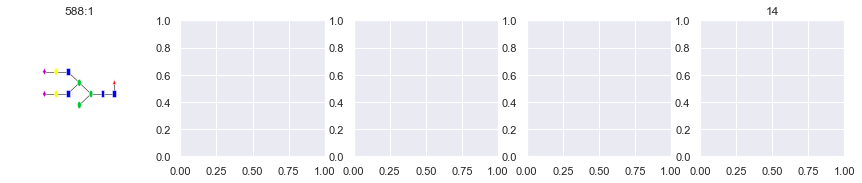

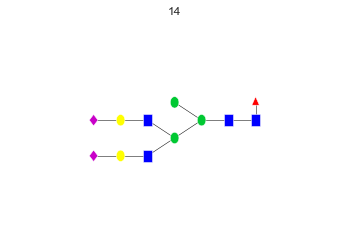

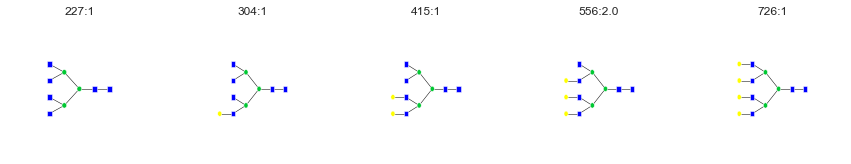

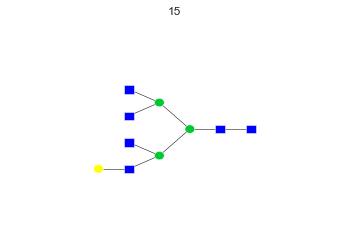

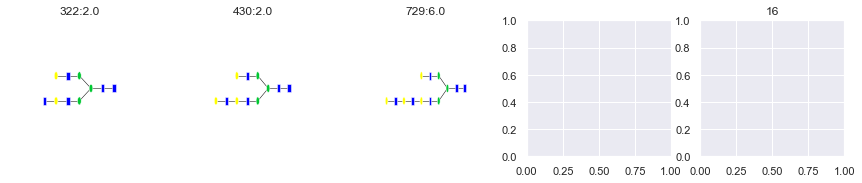

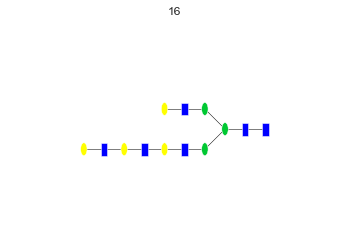

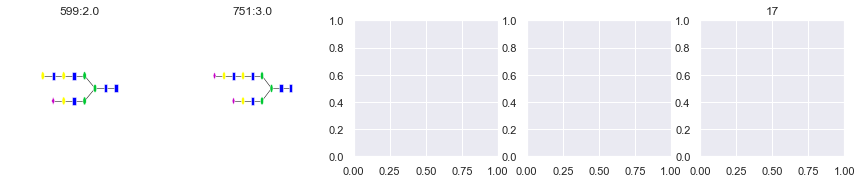

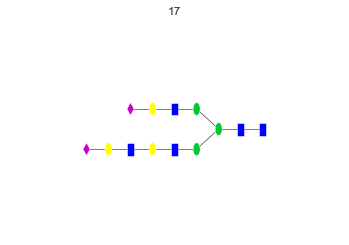

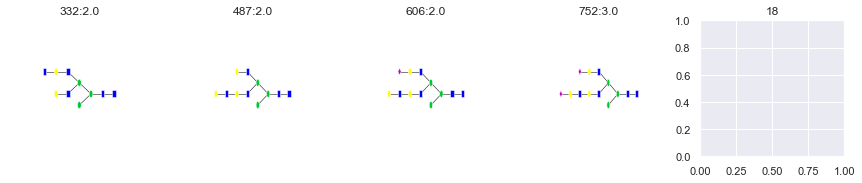

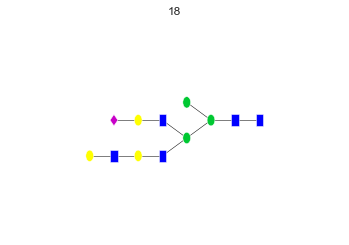

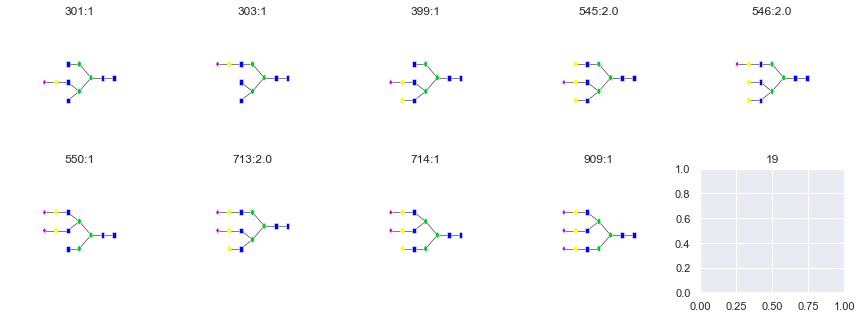

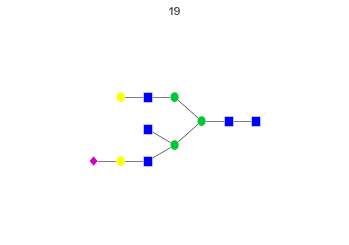

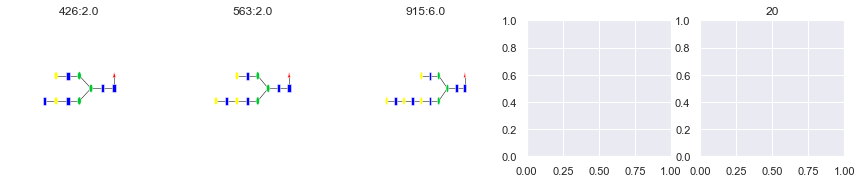

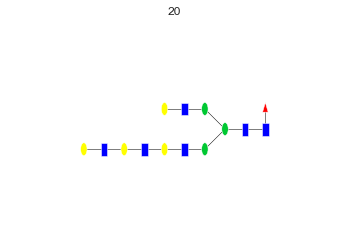

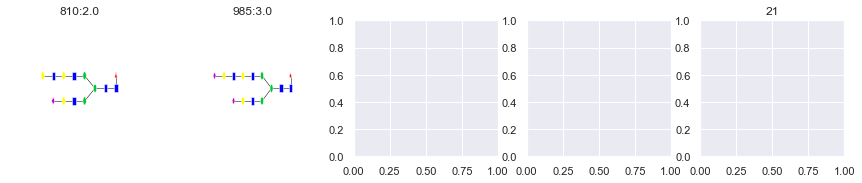

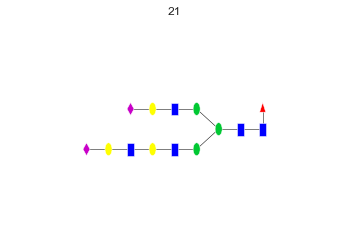

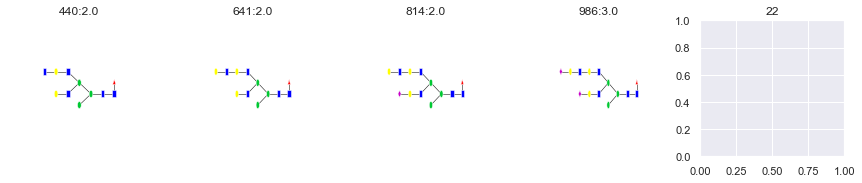

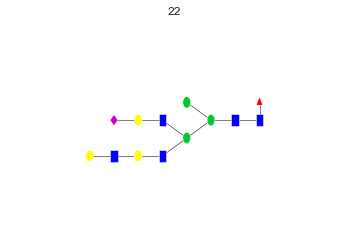

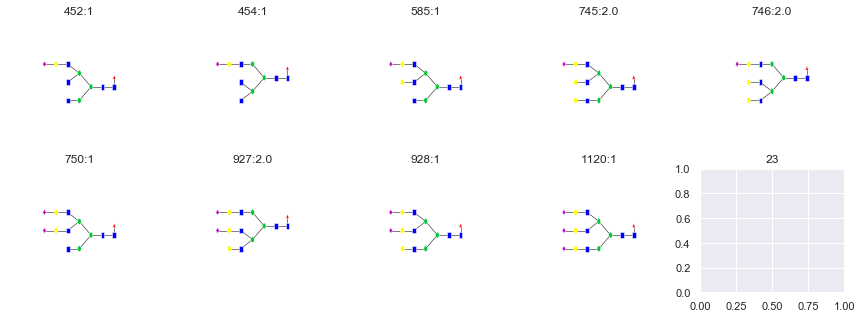

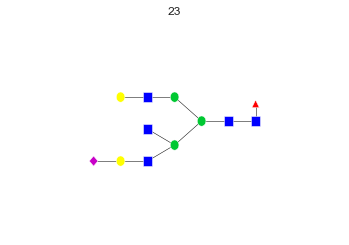

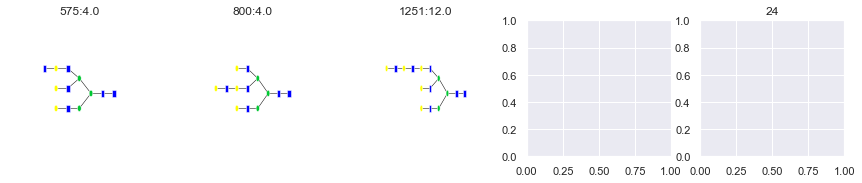

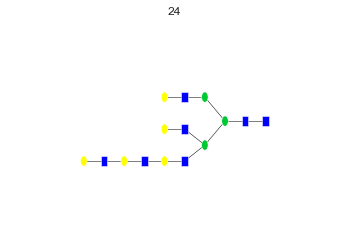

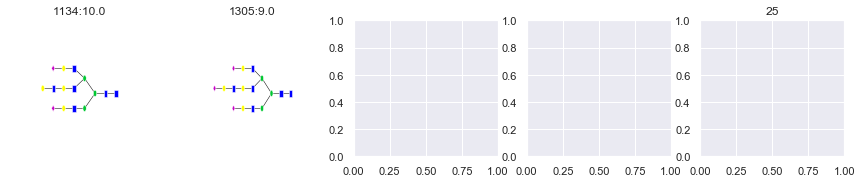

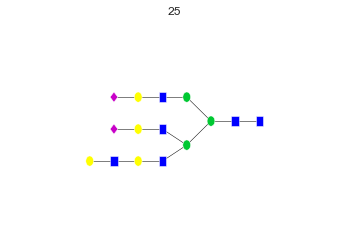

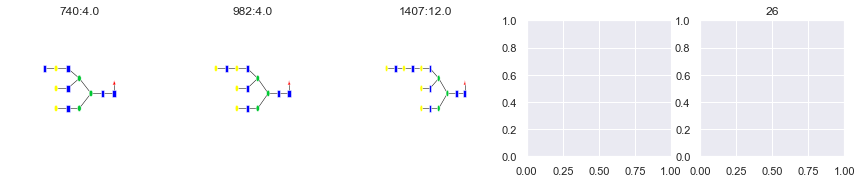

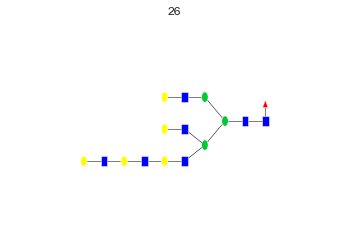

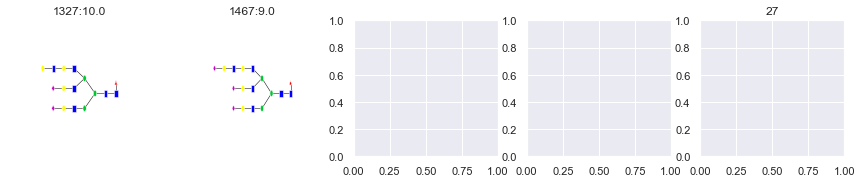

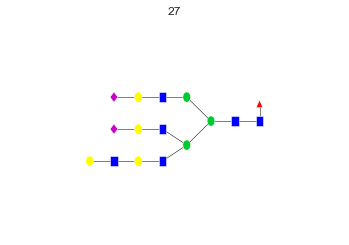

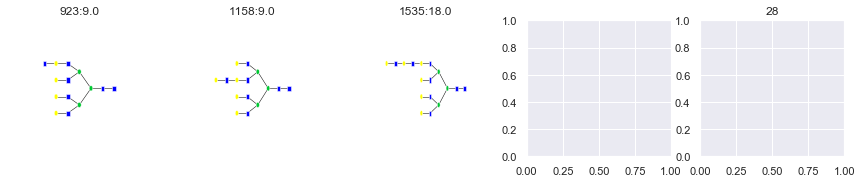

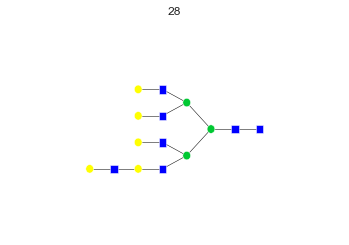

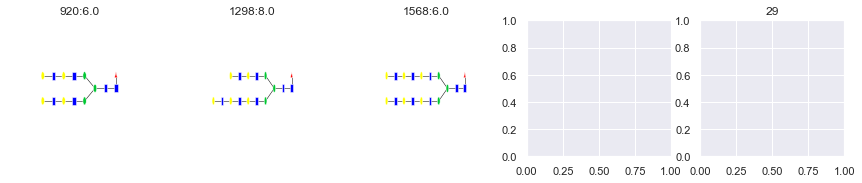

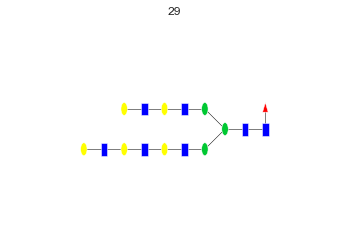

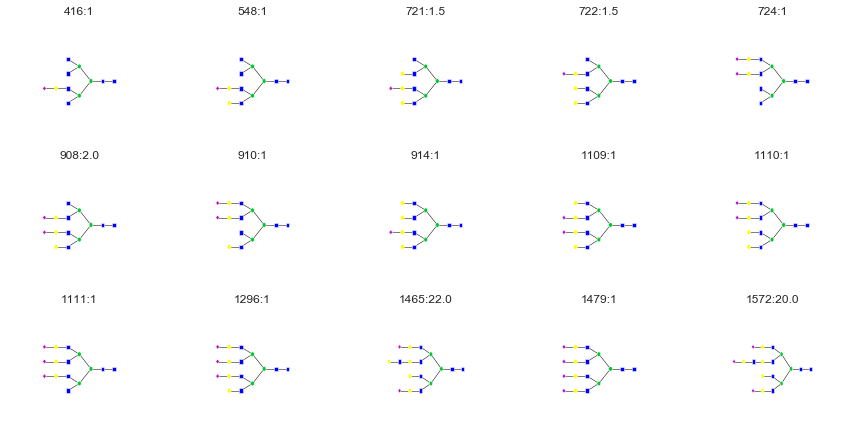

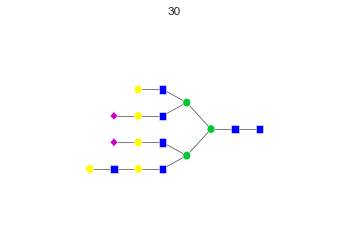

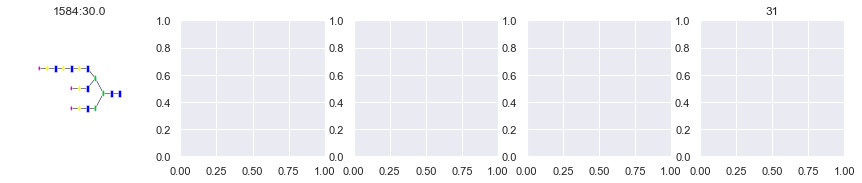

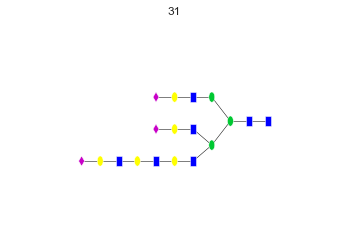

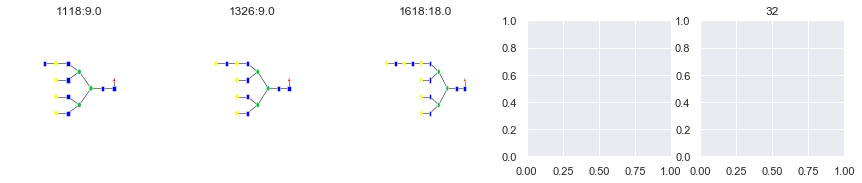

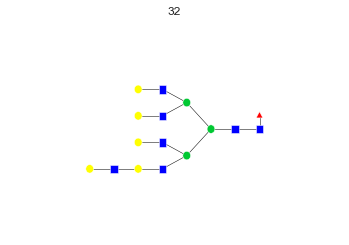

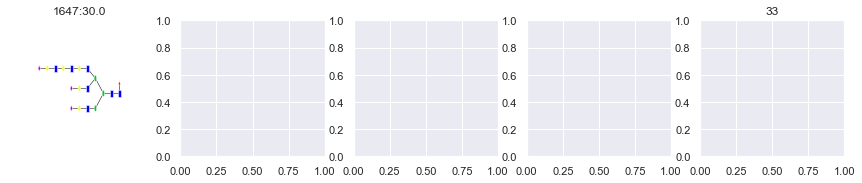

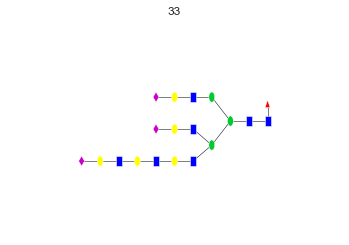

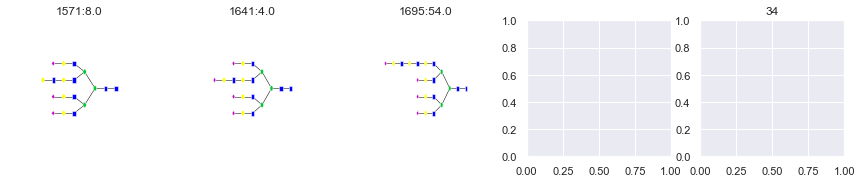

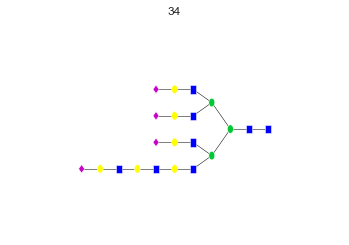

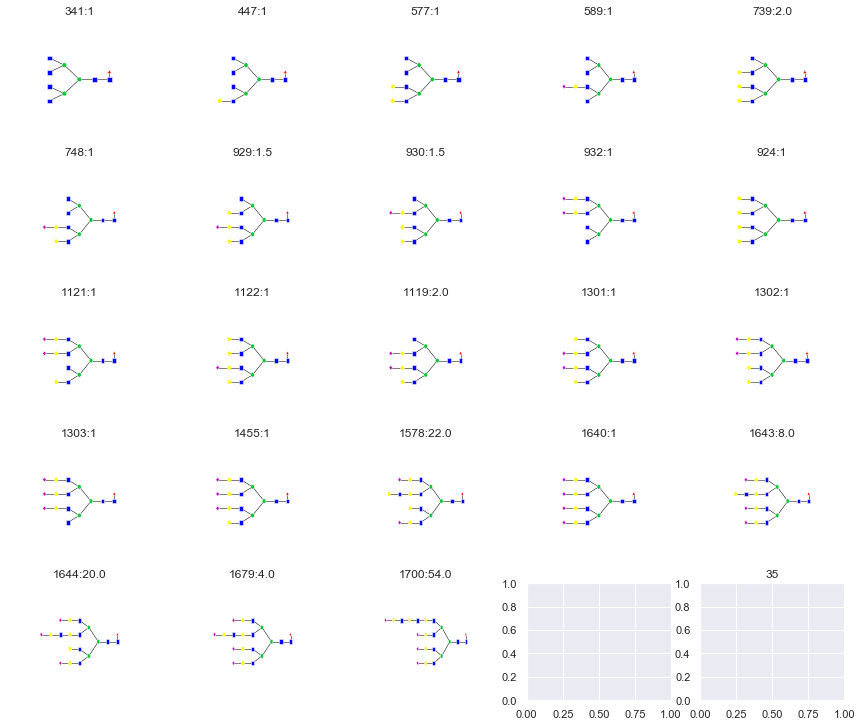

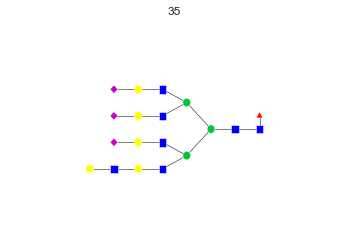

In [46]:
reload(plot_glycan_utilities)
reload(clustering_analysis)
reload(pipeline_functions)

final_cluster_dict = {}
for i in range(1,len(final_cluster_sorted)):
    final_cluster_dict[i] = final_cluster_sorted[i]
rep_list = pipeline_functions.draw_substructure_representative_pip(glyco_motif_cluster=final_cluster_dict,
                                                        substructure_vec=_substructure_lab.substructure_vec,
                                                        motif_weights_dict=merged_weights_dict,
                                                        plot_all_substructure=True,
                                                        address_dir=keywords_dict['plot_output_dir'],
                                                        threshold=0.51,
                                                        use_max=False,
                                                        plot_rep=True)

In [47]:
final_cluster_dict

{1: [77, 104],
 2: [149],
 3: [92, 136, 202],
 4: [115, 151, 216],
 5: [256],
 6: [120, 168, 167, 232, 316],
 7: [173, 237, 351],
 8: [214, 288, 400],
 9: [403],
 10: [114, 150, 184, 212, 213, 249, 287, 328, 344, 451],
 11: [231, 314, 500],
 12: [163, 215, 217, 254, 300, 302, 335, 336, 414, 438, 439, 571],
 13: [343, 450, 586],
 14: [588],
 15: [227, 304, 415, 556, 726],
 16: [322, 430, 729],
 17: [599, 751],
 18: [332, 487, 606, 752],
 19: [301, 303, 399, 545, 546, 550, 713, 714, 909],
 20: [426, 563, 915],
 21: [810, 985],
 22: [440, 641, 814, 986],
 23: [452, 454, 585, 745, 746, 750, 927, 928, 1120],
 24: [575, 800, 1251],
 25: [1134, 1305],
 26: [740, 982, 1407],
 27: [1327, 1467],
 28: [923, 1158, 1535],
 29: [920, 1298, 1568],
 30: [416,
  548,
  721,
  722,
  724,
  908,
  910,
  914,
  1109,
  1110,
  1111,
  1296,
  1465,
  1479,
  1572],
 31: [1584],
 32: [1118, 1326, 1618],
 33: [1647],
 34: [1571, 1641, 1695],
 35: [341,
  447,
  577,
  589,
  739,
  748,
  929,
  930,
  93

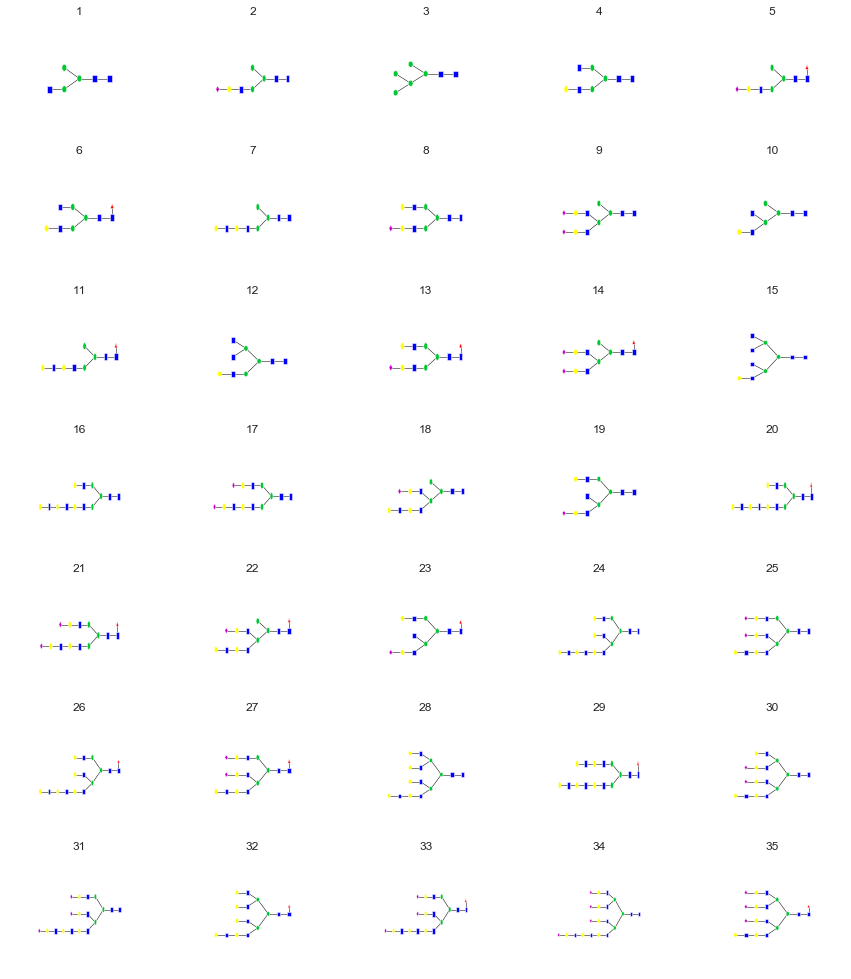

In [48]:
plot_glycan_utilities.plot_glycan_list(rep_list[0:], idex_list=range(1, len(rep_list)+1))

In [49]:
origin_intermediate_network[origin_intermediate_network.index_source==1618]

,enzyme,index_source,index_target
1166,"A3SIAT, A6SIAT",1618,1665
1167,"A3SIAT, A6SIAT",1618,1666
1168,"A3SIAT, A6SIAT",1618,1667
1169,IGNT,1618,1670


In [50]:
nodes_drop = [96, 139, 140, 199, 200, 201, 282, 283, 284, 285, 390, 391, 392, 393, 394, 395, 396, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1254, 1255, 1256, 1257, 1258, 1259, 1260, 1261, 1262, 1263, 1264, 1265, 1266, 1267, 1268, 1269, 1270, 1271, 1272, 1273, 1274, 1275, 1276, 1277, 1278, 1279, 1280, 1281, 1282, 1283, 1284, 1285, 1286, 1287, 1288, 1289, 1290, 1291, 1292, 1293, 1294, 1295, 1413, 1414, 1415, 1416, 1417, 1418, 1419, 1420, 1421, 1422, 1423, 1424, 1425, 1426, 1427, 1428, 1429, 1430, 1431, 1432, 1433, 1434, 1435, 1436, 1437, 1438, 1439, 1440, 1441, 1442, 1443, 1444, 1445, 1446, 1447, 1448, 1449, 1450, 1451, 1452, 1536, 1537, 1538, 1539, 1540, 1541, 1542, 1543, 1544, 1545, 1546, 1547, 1548, 1549, 1550, 1551, 1552, 1553, 1554, 1555, 1556, 1557, 1558, 1559, 1560, 1561, 1562, 1563, 1564, 1565, 1566, 1567, 1619, 1620, 1621, 1622, 1623, 1624, 1625, 1626, 1627, 1628, 1629, 1630, 1631, 1632, 1633, 1634, 1635, 1636, 1637, 1638, 1639, 1668, 1669, 1670, 1671, 1672, 1673, 1674, 1675, 1676, 1677, 1678, 1691, 1692, 1693, 1694, 1699]
mapping_dict = {}
for idex, i in enumerate(final_cluster_dict):
    for j in final_cluster_dict[i]:
        mapping_dict[j]=i
_edge_source = list(origin_intermediate_network.index_source)
_edge_target = list(origin_intermediate_network.index_target)
_enzyme_list = list(origin_intermediate_network.enzyme)
for idex, i in enumerate(_edge_source):
    if i in mapping_dict:
        _edge_source[idex]=mapping_dict[i]
for idex, i in enumerate(_edge_target):
    if i in mapping_dict:
        _edge_target[idex]=mapping_dict[i]
        
# edge_source = list(unspecified_intermediate_network.index_source)
# edge_target = list(unspecified_intermediate_network.index_target)
# enzyme_list = [[i] for i in list(unspecified_intermediate_network.enzyme)]
_remapped_network = pd.DataFrame(data={'index_source':_edge_source, 
                   'index_target': _edge_target,
                  'enzyme':_enzyme_list})
_remapped_network = _remapped_network.sort_values(by=['index_source', 'index_target'])
_edge_source = list(_remapped_network.index_source)
_edge_target = list(_remapped_network.index_target)
_enzyme_list = [[i] for i in list(_remapped_network.enzyme)]

line_count = 1
while line_count < len(_edge_source):
    if _edge_source[line_count]==_edge_source[line_count-1] and _edge_target[line_count]==_edge_target[line_count-1]:
        _enzyme_list[line_count-1].extend(list(_enzyme_list[line_count]))
        del _enzyme_list[line_count]
        del _edge_source[line_count]
        del _edge_target[line_count]
#         print(edge_source[line_count],edge_target[line_count], enzyme_list[line_count-1])
    elif _edge_source[line_count] in nodes_drop or _edge_target[line_count] in nodes_drop:
        
        del _enzyme_list[line_count]
        del _edge_source[line_count]
        del _edge_target[line_count]
#     elif _edge_source[line_count] == _edge_target[line_count]:
#         del _enzyme_list[line_count]
#         del _edge_source[line_count]
#         del _edge_target[line_count]
    else:
        line_count+=1
_enzyme_list = [', '.join(set(sorted(i))) for i in _enzyme_list]

# _edge_source
collapsed_network = pd.DataFrame(data={'index_source':_edge_source, 
                                       'index_target': _edge_target,
                                       'enzyme':_enzyme_list})

# collapsed_network[collapsed_network.index_source==collapsed_network.index_target]
collapsed_network[(collapsed_network.index_source.isin(final_cluster_dict.keys())) & (collapsed_network.index_target.isin(final_cluster_dict.keys()))]

,index_source,index_target,enzyme
0,1,1,B4GALT
1,1,2,"A3SIAT, A6SIAT"
2,1,4,GNTII
3,1,6,A6FUCT
4,1,7,IGNT
5,1,10,GNTIV
6,3,3,"A6FUCT, MANII"
7,4,4,B4GALT
8,4,6,A6FUCT
9,4,8,"A3SIAT, A6SIAT"


In [53]:
_temp_table = collapsed_network[(collapsed_network.index_source.isin(final_cluster_dict.keys())) & (collapsed_network.index_target.isin(final_cluster_dict.keys()))]
# _temp_table.to_csv('../example_data/merging_network/35_representative_network.csv')

_temp_list = set(list(_temp_table.index_source)+list(_temp_table.index_target))
# _temp_table 

_temp_list = sorted(list(_temp_list))
for i in set(list(range(1,36))) -set(_temp_list):
    _edge_source.append(i)
    _edge_target.append(i)
    _enzyme_list.append(i)

collapsed_network = pd.DataFrame(data={'index_source':_edge_source, 
                                       'index_target': _edge_target,
                                       'enzyme':_enzyme_list})
_temp_table = collapsed_network[(collapsed_network.index_source.isin(final_cluster_dict.keys())) & (collapsed_network.index_target.isin(final_cluster_dict.keys()))]
_temp_table.to_csv('../example_data/merging_network/35_representative_network.csv')

In [54]:
# def get_all_connected(source_id, target_id, _temp_network):
#     """ keep searching while there is not new node added"""
#     past_search_id = []
#     cur_search_id = [source_id]
#     while len(set(past_search_id+cur_search_id)) > len(past_search_id):
# #         print('test')
#         past_search_id.extend(cur_search_id)
#         past_search_id = set(past_search_id)
#         past_search_id = list(past_search_id)
#         cur_search_id = list(_temp_network[_temp_network.index_source.isin(cur_search_id)].index_target)
#         if target_id in cur_search_id:
# #             print(_temp_network[_temp_network.index_source.isin(cur_search_id)])
# #             print(cur_search_id)
#             return True
#         cur_search_id = list(set(cur_search_id))
#     return False    
    
# #     """ """
# edge_table = np.zeros((len(final_cluster_sorted), len(final_cluster_sorted)))
# for idex, i in enumerate(final_cluster_sorted):
#     _source_index = idex+1
#     for jdex, j in enumerate(final_cluster_sorted):
#         _target_index = jdex+1
#         if idex==jdex:
#             continue
#         if len(collapsed_network[(collapsed_network.index_source==_source_index) & \
#                        (collapsed_network.index_target==_target_index)].index)!=0:
#             edge_table[idex][jdex] = 1
# #             print(collapsed_network[(collapsed_network.index_source==_source_index) & \
# #                        (collapsed_network.index_target==_target_index)].index)
#         elif len(collapsed_network[(collapsed_network.index_source==_target_index) & \
#                        (collapsed_network.index_target==_source_index)].index)!=0:
#             edge_table[jdex][idex] = 1
# #             print(collapsed_network[(collapsed_network.index_source==_target_index) & \
# #                        (collapsed_network.index_target==_source_index)].index)
#         else:
# #             print(_source_index , _target_index )
#             _temp_set = list(range(1, len(final_cluster_sorted)+1))
#             _temp_set.remove(_target_index)
#             _temp_set.remove(_source_index)
# #             print(_temp_set)
            
#             _temp_network = collapsed_network[(~collapsed_network.index_source.isin(_temp_set)) & (~collapsed_network.index_target.isin(_temp_set))]
# #             _temp_network = _temp_network[_temp_network]
# #             if idex==3 and jdex==10:
# #                 print(_temp_network)
#             if get_all_connected(_source_index, _target_index, _temp_network):
#                 print('True', _source_index , _target_index)
#                 edge_table[idex][jdex] =1
    


True 4 17
True 6 21
True 6 29
True 8 17
True 12 25
True 12 27
True 12 31
True 12 33
True 13 21
True 15 34
True 19 25
True 19 31
True 20 29
True 23 27
True 23 33
True 24 25
True 24 31
True 25 31
True 26 27
True 26 33
True 27 33
True 28 30
True 28 34


In [450]:
_edge_source = []
_edge_target = []
for idex, i in enumerate(edge_table):
    for jdex, j in enumerate(i):
        if edge_table[idex][jdex]==1:
            if edge_table[jdex][idex] ==1:
                print(idex, jdex)
            _edge_source.append(idex+1)
            _edge_target.append(jdex+1)
pd.DataFrame(data={'source': _edge_source, 'target': _edge_target}).to_csv('../example_data/merging_network/40_representative_network.csv')


In [451]:
# def get_all_connected(source_id, target_id, _temp_network):
#     """ keep searching while there is not new node added"""
# #     node_degree = len(node.index)
# #     print('start getting all nodes list ', node_id)
#     past_search_id = []
#     cur_search_id = [source_id]
#     while len(set(past_search_id)+set(cur_search_id)) > len(past_search_id):
#         past_search_id = list(set(past_search_id.extend(cur_search_id)))
#         cur_search_id = _temp_network[_temp_network.index_source.isin(cur_search_index)].index_target
#         if target_id in cur_search_id:
#             return True
#         cur_search_id = list(set(cur_search_id))
#     return False  
# get_all_connected

In [453]:
# _temp_network

# def get_group(start_group, target_group, collapsed_network):
#     a_node_list = sorted(a_node_list)
#     _max = get_degree_span([a_sub_vec[i] for i in a_node_list])
#     count = 0
#     node_group = [[a_node_list[0]]]
#     searched_nodes = []
#     while count < len(a_node_list):
#         _node = a_node_list[count]
#         if _node in searched_nodes:
#             count+=1
#             continue
            
#         _new_nodes = [i for i in get_all_connected(_node, len(a_sub_vec[_node].index), _max, origin_intermediate_network) if i in a_node_list]
#         _found_group = False
        
#         for idex, i in enumerate(node_group):
#             if part_of_list_in_list(i,_new_nodes):
# #                 i.append(_node)
#                 i.extend(_new_nodes)
#                 node_group[idex] = sorted(list(set(i)))
#                 _found_group = True
#                 break
                
#         if not _found_group:
# #             _new_nodes.append(_node)
#             node_group.append(_new_nodes[:])
# #             node_group = list(set(node_group))
#         searched_nodes.extend(_new_nodes)
#         searched_nodes = list(set(searched_nodes))
#         count+=1
#     return node_group

# # def test_connectivity(node_cluster_list, node_reindexed_network):
    
    
# #     """ """
# edge_table = np.zeros((len(node_cluster_list), len(node_cluster_list)))
# for idex, i in enumerate(node_cluster_list):
#     _source_index = idex+1
#     for jdex, j in range(len(node_cluster_list)):
#         _target_index = jdex+1
#     if len(collapsed_network[(collapsed_network.index_source==_source_index) & \
#                    (collapsed_network.index_target==_target_index)].index)!=0:
#         edge_table[idex][jdex] = 1
#     elif len(collapsed_network[(collapsed_network.index_source==_target_index) & \
#                    (collapsed_network.index_target==_source_index)].index)!=0:
#         edge_table[jdex][jdex] = 1
#     else:
#         _temp_set = list(range(1, len(node_cluster_list)+1))
#         _temp_set.remove(_target_index)
#         _temp_set.remove(_source_index)
#         _temp_network = collapsed_network[(~collapsed_network.index_source.isin(_temp_set)) & (~collapsed_network.index_target.isin(_temp_set))]
#         _temp_network

In [456]:
# origin_intermediate_network

# a_node_new_index_dict = {}
# for idex, i in enumerate(_collapsed_node):
#     a_node_new_index_dict[i] = idex+1

# for idex,i in enumerate([24,9,23,8,22,21,15,16,1,19,18,17,3,2,20,12,13,10,11,6,5,14,7,4]):
#     a_new_dict[idex+1] = glyco_motif_cluster_dict[i]
#     for nodes in glyco_motif_cluster_dict[i]:
#         a_node_new_index_dict[nodes] = idex-24
# a_node_new_index_dict[51] = -24

# a_node_new_index_list = list(set([a_node_new_index_dict[i] for i in a_node_new_index_dict]))
# print(sorted(a_node_new_index_list))
# cluster_edge = []
# for _in, _out in _collapsed_edge_list:
#     cluster_edge.append((a_node_new_index_dict[_in], a_node_new_index_dict[_out]))
#     print((_in, _out), cluster_edge[-1])

In [184]:
# import seaborn as sns
# import clustering_analysis
# import scipy
# from copy import deepcopy
# reload(clustering_analysis)
# # sns.set("RdBu_r", 7)
# # dropper.drop_node()
# # print("", len(dropper.drop_node()))
# # # motif_abd_table =  substructure_abd_table[_table_col]


# if 51 in mod_nodes:
#     mod_nodes.remove(51)
# # print(motif_abd_table.head())
# df_ncore = deepcopy(motif_abd_table)
# # print(sorted(mod_nodes))
# print(df_ncore.shape)
# # draw plot
# # motif_with_n_glycan_core_all_motif(motif_, _table, weight_dict)
# """ with n_glycan_core using jaccard for binary and use braycurtis for float
# """
# df_ncore.columns=selected_name_list
# from sklearn import preprocessing
# import numpy as np
# import matplotlib.pyplot as plt

# # df_ncore=pd.DataFrame(data=preprocessing.scale(df_ncore.transpose()).transpose(), index=df_ncore.index, columns=df_ncore.columns)
# df_ncore.to_csv(os.path.join(keywords_dict['intermediate_dir'], str(len(selected_name_list))+r"selected_abundance_matrix.txt"))
# motif_abd_table.colmuns=selected_name_list
# # motif_abd_table.to_csv(__init__.json_address + r"full_abundance_matrix.txt")
# name_prefix = 'dropped'
# # sns.palplot(sns.color_palette("RdBu_r", 7))
# cmap = sns.color_palette("Reds", 25)
# g = sns.clustermap(df_ncore, metric="correlation", cmap=cmap, linewidths=.02, figsize=(20,20),linecolor='black', method='complete')
# plt.savefig(keywords_dict['plot_output_dir']+'pseudo_profile_clustering.svg')
# # clustering_analysis.draw_profile_cluster(g, df_ncore, selected_name_list, name_prefix, color_threshold=0.5, address=keywords_dict['plot_output_dir']+'profile_clustering.svg')
# # cccluster_dict = clustering_analysis.draw_motif_cluster(g, df_ncore, name_prefix, color_threshold=0.185, fig_size=(6, 20))

 

# Role substructure representative abundance table for Fig 2c and Fig 2d 
## Note: Since clusters in cluster map are automatically ordered by searborn, I reorder the clusters with n-glycan features without significantly changing the cluster hierarchy.

## branch: 1-> 4
## galactose: 1-> 4
## sialyation: 1-> 4
## fucose: 0 -> 1

We tested that these 24 clusteres in different computers might have different indexs. But only indexs have inconsistency. 

rearanged_list = [21,22,20,23,18,16,17,19,13,1,14,12,2,3,15,7,8,10,11,5,4,9,24,6]


In [228]:
profile_dict={1:["EPO127.mgat1."],
2:["EPO174.mgat2."],
3:["EPO266.fut8."],
4:["KI_ST6GalNAc1.st3gal4.st3gal6.mgat4a.mgat4b.mgat5",
   "st3gal4.st3gal6.mgat4a.mgat4b.mgat5",
   "B3gnt2.mgat4a.mgat4b.mgat5",
   "mgat4A.mgat4B.mgat5",
   ],
5:["mgat5",
   "mgat4A.mgat4B",
   "EPO78.mgat4B."],
6:["st3gal4.st3gal6"], 
7:["B4GalT1",
   "B4GalT2",
   "B4GalT3",
   "B4GalT4",
   "WT",]}

# rearanged_list = [21,22,20,23,18,16,17,19,13,1,14,12,2,3,15,7,8,10,11,5,4,9,24,6]
# rearanged_list = [24,9,23,8,22,21,15,16,1,19,18,17,3,2,20,12,13,10,11,6,5,14,7,4]
# for idex, i in enumerate(range(len(final_cluster_sorted))):
#     plot_glycan_utilities.plot_glycan(rep_list[i-1], title=str(idex+1)+','+str(i))

profile_Gly=[]
profile_name_order = []
for i in range(1,len(profile_dict)+1):
    for j in profile_dict[i]:
        profile_Gly.append(j)
        profile_name_order.append(j)
def generate_weight(vec_, merged_weights_dict):
    weight_vec = [merged_weights_dict[i] for i in vec_]
    _sum =sum(weight_vec)
    return [i/_sum for i in weight_vec]


substructure_table = np.zeros((len(final_cluster_dict),16))
for i in range(1,len(final_cluster_dict)+1):
    temp_table =  deepcopy(motif_abd_table[profile_name_order][motif_abd_table.index.isin(final_cluster_dict[i])])
    temp_table = np.array(temp_table)
    _weight_vec = generate_weight(sorted(final_cluster_dict[i]), merged_weights_dict)
    _substructure_vec = np.zeros((1,16))
    for idex, j in enumerate(temp_table):
        _substructure_vec += j*_weight_vec[idex]
#     scaler = preprocessing.StandardScaler().fit(temp_table)
    substructure_table[i-1,] = _substructure_vec[0,]


In [229]:
substre_profile=pd.DataFrame(data=substructure_table.transpose(), columns=range(1,len(final_cluster_dict)+1))
substre_profile_init=copy.deepcopy(substre_profile)
# substre_profile_init[]
substre_profile_zscore=substre_profile.apply(zscore)
locate_list = []
for i in substre_profile_zscore.columns:
    _agg = substre_profile_zscore[i][(substre_profile_zscore[i]>3) | (substre_profile_zscore[i]<-3)]
    if len(_agg.index) == 1:
        locate_list.append((i, _agg.index[0]))
# substre_profile_zscore = substre_profile_zscore.transpose()
needed_dict = dict(locate_list)
print(needed_dict)

{1: 0, 3: 0, 7: 1, 11: 1, 16: 10, 18: 1, 20: 10, 22: 1, 24: 10, 26: 10, 28: 10, 29: 4, 31: 2, 32: 10, 34: 2}


In [174]:
# substre_profile_init
# for init check each index
substre_profile_init.head()

,1,2,3,4,5,6,7,8,9,10,...,26,27,28,29,30,31,32,33,34,35
0,0.000000,0.000000,0.727925,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0
1,1.000000,1.000000,0.000000,0.000000,1.000000,0.400000,0.487651,0.000000,0.274479,0.987458,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0
2,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.089093,1.000000,0.834998,0.459440,...,0.0,0.0,0.057615,0.000000,0.214833,0.019603,0.0,0.0,0.032238,0.0
3,0.992804,0.985607,0.000000,0.980405,0.985607,0.985364,0.000000,0.958598,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0
4,0.994758,0.000000,0.000000,0.976867,0.000000,0.984023,0.105782,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.031578,0.000000,0.000000,0.0,0.0,0.000000,0.0


In [244]:
import copy

resetted_score = np.zeros((substre_profile_init.transpose().shape))

for idex, i in enumerate(substre_profile_init.columns):
    if i in needed_dict.keys():
        _temp_list_raw = substre_profile_init[i]
        print('_temp_list', _temp_list)
        _temp_index = _temp_list_raw[_temp_list_raw.index==needed_dict[i]].index[0]
        print('_temp_index', _temp_index)
        removed_num = _temp_list_raw[_temp_index]
        print('removed_num', removed_num)
        _temp_list= _temp_list_raw.drop(_temp_index)
        
        _mean = _temp_list.mean()
        _std = _temp_list.std()
        
        new_temp_index=list((_temp_list-_mean)/_std)
        
        if _std==0:
            new_temp_index = [0]*len(new_temp_index)
            if removed_num-_mean>0:
                print()
                new_temp_index.insert(_temp_index, 4)
            else:
                new_temp_index=zscore(_temp_list_raw)

        else:
            
            if removed_num-_mean>0:
#                 print()
                new_temp_index.insert(_temp_index, (removed_num-_mean)/_std)
            else:
                new_temp_index=zscore(_temp_list_raw)
#             new_temp_index.insert(_temp_index, (removed_num-_mean)/_std)
        resetted_score[idex]=new_temp_index
    else:
        _temp_list = substre_profile_init[i]
        _mean = _temp_list.mean()
        _std = _temp_list.std()
        new_temp_index=list((_temp_list-_mean)/_std)
        resetted_score[idex]=new_temp_index
ttest_table = pd.DataFrame(resetted_score, columns=profile_name_order, index=range(1,len(final_cluster_dict)+1))
base = list(ttest_table.WT.tolist())
for i in ttest_table.columns:
    ttest_table[i]=ttest_table[i]-base
# base = 
# for i in ttest_table.columns:
#     print(base)
#     substre_profile_zscore_with_baseWT[i]=substre_profile_zscore_with_baseWT[i]-base
# list.insert

_temp_list 0     0.000000
1     0.000000
2     0.000000
3     0.000000
4     0.000000
5     0.000000
6     0.000000
7     0.000000
8     0.000000
9     0.000000
10    0.034073
11    0.035139
12    0.098065
13    0.123647
14    0.144050
15    0.145017
Name: 35, dtype: float64
_temp_index 0
removed_num 0.0
_temp_list 0     0.000000
1     1.000000
2     1.000000
3     0.985607
4     0.000000
5     0.952270
6     0.973432
7     0.968353
8     0.973339
9     1.000000
10    0.000000
11    0.346590
12    0.984724
13    1.000000
14    1.000000
15    0.983567
Name: 2, dtype: float64
_temp_index 0
removed_num 0.7279252372464955

_temp_list 0     0.000000
1     0.400000
2     0.000000
3     0.985364
4     0.984023
5     0.991829
6     1.000000
7     1.000000
8     1.000000
9     1.000000
10    0.997729
11    0.603941
12    1.000000
13    1.000000
14    1.000000
15    1.000000
Name: 6, dtype: float64
_temp_index 1
removed_num 0.48765107724645296
_temp_list 0     0.000000
1     0.987458
2     0.459

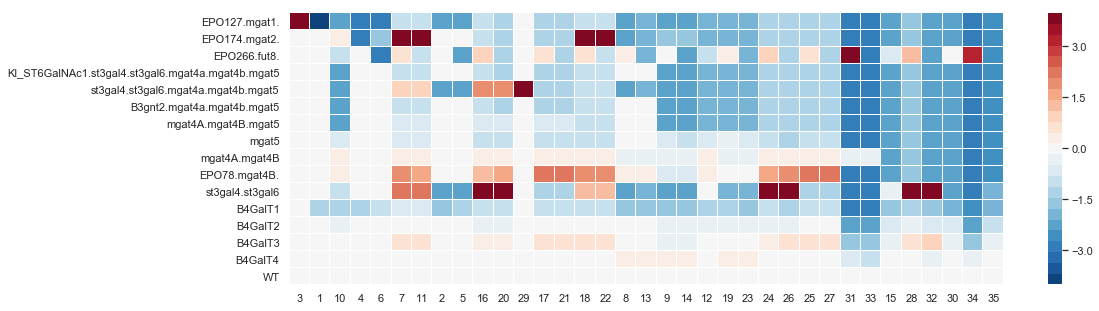

In [237]:
fig, ax = plt.subplots(figsize=(16,5))
rerearrange=[3,1,10,4,6,7,11,2,5,16,20,29,17,21,18,22,8,13,9,14,12,19,23,24,26,25,27,31,33,15,28,32,30,34,35 ]
# ttest_table=ttest_table.transpose()[rerearrange]
sns.heatmap(ttest_table.round(2), vmin=-4, vmax=4, ax=ax, cmap=sns.color_palette("RdBu_r", 25), linewidths=.01, linecolor='white')
plt.show()


In [60]:
rearrange=[1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 3, ]



In [61]:
set(motif_abd_table.index)-set(_index)

{84}

In [62]:
reorder_glycoprofile_table = np.zeros((154,16))
_cur_row = 0
_index = []
for i in sorted(list(final_cluster_dict), reverse=True):
    temp_table = deepcopy(motif_abd_table[profile_name_order][motif_abd_table.index.isin(final_cluster_dict[i])])
    _index.extend(final_cluster_dict[i])
    temp_table = np.array(temp_table)
    for j in range(temp_table.shape[0]):
        reorder_glycoprofile_table[_cur_row]=temp_table[j]
        _cur_row += 1

cluster_table_redraw = pd.DataFrame(data=reorder_glycoprofile_table, index=_index, columns=profile_name_order).transpose()

In [63]:
# import bootstrapped
import numpy as np
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats

for i in substre_profile.columns:
    print('previous mean', np.mean(substre_profile[i]))
    print(np.array(substre_profile[i]))
    print('now mean', bs.bootstrap(np.array(substre_profile[i]), stat_func=bs_stats.mean))
    print('previous std', np.std(substre_profile[i]))
    print('now std', bs.bootstrap(np.array(substre_profile[i]), stat_func=bs_stats.std))

    

NameError: name 'substre_profile' is not defined

# Figure 2c Substructure representative table

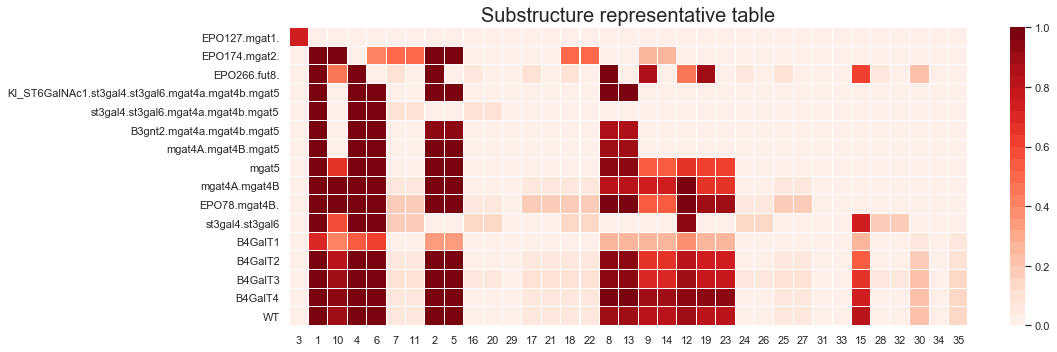

In [243]:
substre_profile=pd.DataFrame(data=substructure_table.transpose(), index=profile_name_order, columns=range(1,len(final_cluster_dict)+1))
# substre_profile=substre_profile[rearrange]
fig, ax = plt.subplots(figsize=(16,5))
substre_profile=substre_profile.round(5)
substre_profile.to_csv(keywords_dict['output_data_dir']+keywords_dict['project_name']+"_abundance_representatives.csv")
sns.heatmap(substre_profile[rerearrange].round(2), ax=ax, cmap=sns.color_palette("Reds", 25), linewidths=.01, linecolor='white')
plt.title('Substructure representative table', size=20)
plt.tight_layout()
plt.savefig(keywords_dict['plot_output_dir']+keywords_dict['project_name']+'_raw_abundance_sub.eps')
plt.show()
# substre_profile_zscore.round(2).to_csv(os.path.join(keywords_dict['intermediate_dir'], str(len(selected_name_list))+r"substre_profile_zscore.txt"))

# plt.tight_layout()
# plt.savefig(keywords_dict['plot_output_dir']+'/raw_abundance_sub_shifted.eps')
# plt.show()

In [66]:
substre_profile.transpose().to_csv(keywords_dict['output_data_dir']+keywords_dict['project_name']+"_node_attri.csv")

# 1-sample one-side wilcoxn test with zsplit
### zsplit includes zero-differences in the ranking process and splits the zero rank between positive and negative ones

In [68]:
# from scipy.stats import shapiro, anderson, boxcox
from scipy.stats import yeojohnson, probplot, wilcoxon
from scipy import stats

# i = substre_profile.columns[0]
# _a, _b = wilcoxon(substre_profile[i]-j, zero_method='zsplit')

# wilcoxon_statistic_table = np.zeros(substre_profile.shape)
# p_value_table = np.zeros(substre_profile.shape)
# for idex, i in enumerate(substre_profile.columns):
# #     print(substre_profile[i])
#     b_a,b_b = wilcoxon(substre_profile[i]-substre_profile[i][-1], zero_method='zsplit', correction=True, alternative='greater')
#     for jdex, j in enumerate(substre_profile[i]):
# #         print(substre_profile[i]-j)
# #         print('j:',j, )
# #         print(type(i), type(j))
#         if j > substre_profile[i][-1]:
#             test = 'greater'
#         else:
#             test = 'less'
#         _a,_b=wilcoxon(substre_profile[i]-j, zero_method='zsplit', correction=True, alternative=test)
# #         _a,_b=(wilcoxon(substre_profile[i]-j, zero_method='zsplit'))
#         wilcoxon_statistic_table[jdex,idex]=b_a-_a
#         p_value_table[jdex,idex]=_b if _b < 0.5 else 1-_b

        
# substre_profile=pd.read_csv(keywords_dict['intermediate_dir']+keywords_dict['project_name']+"_abundance_representatives.csv", index_col=0)
# substre_profile.columns=range(1,25)
# substre_profile

In [189]:
from scipy.stats import norm
import numpy as np
def get_effect_size(p, sample_size=16):
    return np.abs(norm.ppf(p)/np.sqrt(sample_size))

print(get_effect_size(0.0031))
for idex in [18,20]:
    i = substre_profile.columns[idex]
    for jdex in [2]:
        j = substre_profile[i][jdex]
        # help(stats.wilcoxon)
        if j > substre_profile[i][-1]:
            test = 'greater'
        elif j < substre_profile[i][-1]:
            test = 'less'
        else: 
            test='same'
        print(i, test, substre_profile[i][jdex], substre_profile.index[jdex])
        
        _a,_b=stats.wilcoxon(substre_profile[i]-j, zero_method='zsplit', correction=True)
        #         _a,_b=(wilcoxon(substre_profile[i]-j, zero_method='zsplit'))
        _b=_b/2 if _b < 0.5 else (1-_b)/2
        
        print(_a, _b, get_effect_size(_b))
    print("\n")

0.6842530416211653
19 greater 0.07602 EPO266.fut8.
2.5 0.00027233836108283345 0.8644411940657835


21 greater 0.03307 EPO266.fut8.
0.5 0.0002030214484087167 0.8840311883985099




In [23]:
#St3gal4/6
reload(stats)
i = substre_profile.columns[12]
jdex= -6
# help(stats.wilcoxon)
j = substre_profile[i][-6]

if j > substre_profile[i][-1]:
            test = 'greater'
else:
            test = 'less'
print(i, test, substre_profile[i][jdex], substre_profile.index[jdex])
_a,_b=stats.wilcoxon(substre_profile[i]-j, zero_method='zsplit', correction=True)
#         _a,_b=(wilcoxon(substre_profile[i]-j, zero_method='zsplit'))
_b=_b/2 if _b < 0.5 else (1-_b)/2
print("st3gal4.st3gal6: Rep",_a, _b, get_effect_size(_b))


i = substre_profile.columns[19]
# jdex=substre_profile.index[-6]
# help(stats.wilcoxon)
j = substre_profile[i][-6]
if j > substre_profile[i][-1]:
            test = 'greater'
else:
            test = 'less'
print(i, test, substre_profile[i][jdex], substre_profile.index[jdex])
_a,_b=stats.wilcoxon(substre_profile[i]-j, zero_method='zsplit', correction=True)
#         _a,_b=(wilcoxon(substre_profile[i]-j, zero_method='zsplit'))
_b=_b/2 if _b < 0.5 else (1-_b)/2
print(_a, _b, get_effect_size(_b))

13 greater 0.27765 st3gal4.st3gal6
st3gal4.st3gal6: Rep 9.5 0.001331693992636731 0.7510332699033224
20 greater 0.13302 st3gal4.st3gal6
0.5 0.00023493347892443456 0.8743428828779


In [24]:
for idex in [8,12,13, 14]:
    i = substre_profile.columns[idex]
    for jdex in [7,8,9]:
        j = substre_profile[i][jdex]
        # help(stats.wilcoxon)
        if j > substre_profile[i][-1]:
            test = 'greater'
        elif j< substre_profile[i][-1]:
            test = 'less'
        else: 
            test='same'
        print(i, test, substre_profile[i][jdex], substre_profile.index[jdex])
        
        _a,_b=stats.wilcoxon(substre_profile[i]-j, zero_method='zsplit', correction=True)
        #         _a,_b=(wilcoxon(substre_profile[i]-j, zero_method='zsplit'))
        _b=_b/2 if _b < 0.5 else (1-_b)/2
        print(_a, _b, get_effect_size(_b))
    print("\n")

for idex in range(15,22):
    i = substre_profile.columns[idex]
    for jdex in range(7,10):
        j = substre_profile[i][jdex]
        # help(stats.wilcoxon)
        if j > substre_profile[i][-1]:
            test = 'greater'
        elif j< substre_profile[i][-1]:
            test = 'less'
        else: 
            test='same'
        print(i, test, substre_profile[i][jdex], substre_profile.index[jdex])
        
        _a,_b=stats.wilcoxon(substre_profile[i]-j, zero_method='zsplit', correction=True)
        #         _a,_b=(wilcoxon(substre_profile[i]-j, zero_method='zsplit'))
        _b=_b/2 if _b < 0.5 else (1-_b)/2
        print(_a, _b, get_effect_size(_b))
    print("\n")

9 less 0.0111 mgat5
18.5 0.00561554794524357 0.6338562626601719
9 greater 0.06393 mgat4A.mgat4B
51.5 0.20386529659727454 0.20697347352168877
9 greater 0.54083 EPO78.mgat4B.
0.5 0.0002633412461079878 0.8667014203720715


13 less 0.0111 mgat5
25.5 0.014799825955957377 0.5438516782058542
13 greater 0.06603 mgat4A.mgat4B
38.5 0.0665399626006086 0.3755166349516612
13 greater 0.54083 EPO78.mgat4B.
0.5 0.00025994674622859443 0.8675729152331485


14 less 0.0111 mgat5
42.5 0.09674099214411941 0.32508680976885984
14 greater 0.06288 mgat4A.mgat4B
22.5 0.009625745597948222 0.5851562575839482
14 greater 0.54083 EPO78.mgat4B.
0.5 0.00024613234937270913 0.8712326501805452


15 less 0.0 mgat5
33.0 0.03191303804748083 0.46334820431459367
15 less 0.0063 mgat4A.mgat4B
2.5 0.00023979932198436152 0.872974877694162
15 less 0.0 EPO78.mgat4B.
33.0 0.03191303804748083 0.46334820431459367


16 less 0.0 mgat5
22.5 0.00877425727946951 0.5937522907154171
16 less 0.0 mgat4A.mgat4B
22.5 0.00877425727946951 0.5937522

In [ ]:

def ecdf(data):
    """ Compute ECDF """
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    plt.scatter(x=x, y=y)
    plt.show()

_count = 0
_len = 5
# plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(9, 5, constrained_layout=True)
# fig.patch.set_facecolor('white')
fig.suptitle('Empirical cumulative distribution function for substructure representatives', size=20)

fig.set_size_inches(10,15)
for idex, i in enumerate(substre_profile.columns):
#     fig.add_subplot(4, 6, idex+1)
    #             print(i)
    #             print(divmod(_count, _a))
    _x, _y = divmod(_count, _len)
    x = np.sort(substre_profile[i])
    n = x.size
    y = np.arange(1, n+1) / n
    axe=ax[_x][_y]
    axe.set_ylim(-0.1,1.1)
#     axe.set_xlim(-0.1,1.1)
    axe.set_facecolor('white')
    axe.scatter(x=x, y=y ,edgecolors='black')
    axe.set_title(str(idex))
#     plt.show()
    _count += 1
# plt.show()
plt.savefig(keywords_dict['plot_output_dir']+keywords_dict['project_name']+"_ECDF.eps")


# Selected the example for Figure 2d, 3

In [69]:
import numpy as np
import matplotlib.pyplot as plt
#  matplotlib.rc('xtick', labelsize=20) 
# matplotlib.rc('ytick', labelsize=20)
def compare_profile(profile_table, name_list, ax, addr=None):
    # data to plot

    # create plot
    profile_table.columns=name_list
#     print('a', profile_table.shape)
#     print('a', profile_table)
#     for i in zip(range(profile_table.shape[0]),profile_table.iloc[:,0]):
#         print(i)
#     print(profile_table.iloc[0,0])
#     print('fini')
    index = np.arange(profile_table.shape[0])
    bar_width = min(0.25, 1/(profile_table.shape[1]+2))
    opacity = 0.8
    rects_list=[0]*profile_table.shape[1]
    if ax is None:
        fig, ax = plt.subplots(figsize=(8 ,3))
        ax.set_facecolor('white')
#         plt
        plt.xlabel('Substructure', size=20)
        plt.ylabel('Stdscaled difference', size=20)
        plt.title('Glycoprofile comparison', size=20)
        plt.xlabel('Substructure', size=20)
        plt.ylim(-5,5)
        
        for i,j in enumerate(profile_table.columns):
            plt.bar(index+i*bar_width, profile_table[j], bar_width,
    #                  alpha=opacity,
    #                  color='b',
                     label=str(j))
        plt.legend(name_list, loc=1)
        plt.yticks(size=15)
        plt.axhline(y=0, color='Black', linestyle='-',linewidth=0.1)
        plt.yticks([-4,-2,0,2,4], ['-4','-2','0','2','4'])
        plt.xticks(index-1/(profile_table.shape[1]+2), ([str(x) for x in range(1, profile_table.shape[0]+1)]))
        plt.savefig(addr)
        plt.tight_layout()
    else:
#         print(name_list)
        print('index', index)
        ax.set_facecolor('white')
        ax.set_ylim(-5,5)
#     ax.set_yticklabels(size=15)
        
    
        for i,j in enumerate(profile_table.columns):
            ax.bar(index+i*bar_width, profile_table[j], bar_width,
    #                  alpha=opacity,
    #                  color='b',
                     label=str(j))
        ax.legend(name_list, loc=2)
        ax.set_yticks([-4,-2,0,2,4])
        ax.axhline(y=0, color='Black', linestyle='-',linewidth=0.5)
        ax.set_yticklabels(['-4','-2','0','2','4'])
        ax.set_xticks(index-1/(profile_table.shape[1]+2), )
        ax.set_xticklabels(([str(x) for x in range(1, profile_table.shape[0]+1)]))
    if addr:
        
#     ax.tight_layout()
        plt.savefig(addr)
# compare_profile(substre_profile[])

# Raw plots and related plots for Figure 2d

In [98]:
substre_profile_init = substre_profile_init.transpose()

In [76]:

#         _temp_list
# print(locate_list)

# def get_z_distribution(an_array):
#     pd.zscore()
    
# def test_dropout():
    

# fig, ax = plt.subplots(figsize=(16, 5))
# sns.heatmap(substre_profile_zscore.round(2), ax=ax, cmap=sns.color_palette("RdBu_r", 40), linewidths=.01, linecolor='white', annot=True)

if 'B4GalT2' in substre_profile_zscore.columns:
    pass
else:
    substre_profile_zscore = substre_profile_zscore.transpose()
substre_profile_zscore=substre_profile_zscore.round(3)
substre_profile_zscore_with_baseWT = substre_profile_zscore.copy()
base = list(substre_profile_zscore.WT.tolist())
for i in substre_profile_zscore_with_baseWT.columns:
#     print(base)
    substre_profile_zscore_with_baseWT[i]=substre_profile_zscore_with_baseWT[i]-base


# for idex, i in enumerate(condense_plot):
#     #             print(i)
#     #             print(divmod(_count, _a))
#     _name_list = [i]
    
# #     _x, _y = divmod(_count, _len)
#     ax=axes[idex][0]
#     compare_profile(deepcopy(substre_profile_zscore_with_baseWT[_name_list]), [condense_plot_name[idex]], ax=ax)#addr=__init__.plot_output_address+"substructure_cluster_"+str(i)+".eps")
# #     _count += 1
# plt.savefig(keywords_dict['plot_output_dir']+"substructure_cluster_condense.eps")

[(1, 'EPO127.mgat1.'), (7, 'EPO174.mgat2.'), (11, 'EPO174.mgat2.'), (16, 'st3gal4.st3gal6'), (18, 'EPO174.mgat2.'), (20, 'st3gal4.st3gal6'), (22, 'EPO174.mgat2.'), (24, 'st3gal4.st3gal6'), (26, 'st3gal4.st3gal6'), (28, 'st3gal4.st3gal6'), (29, 'st3gal4.st3gal6.mgat4a.mgat4b.mgat5'), (31, 'EPO266.fut8.'), (32, 'st3gal4.st3gal6'), (34, 'EPO266.fut8.'), (3, 'EPO127.mgat1.')]


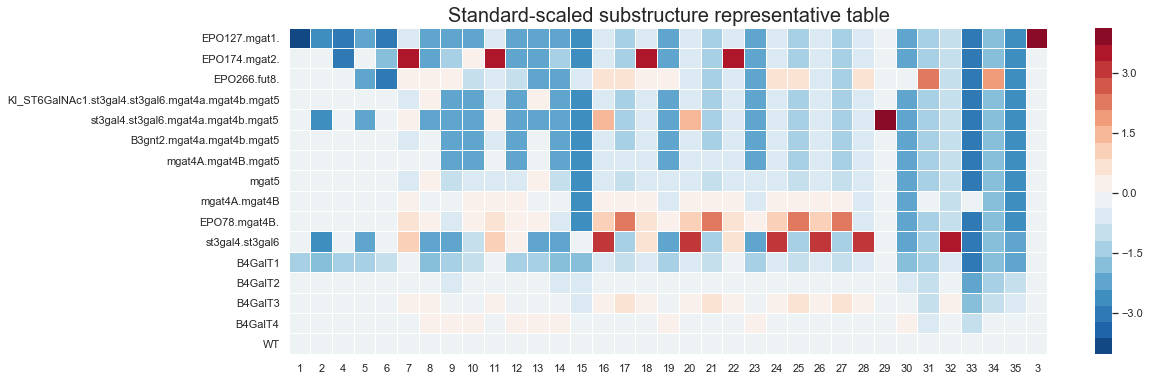

In [204]:
substre_profile_zscore_with_baseWT1=substre_profile_zscore_with_baseWT.transpose()
substre_profile_zscore_with_baseWT1.to_csv(keywords_dict['plot_output_dir']+keywords_dict['project_name']+ r"_substructure_matrix_std_base.txt")
fig, ax = plt.subplots(figsize=(17,6))
sns.heatmap(substre_profile_zscore_with_baseWT1.round(2), ax=ax, cmap=sns.color_palette("RdBu_r", 20), linewidths=.005, linecolor='white')
plt.title('Standard-scaled substructure representative table', size=20)
substre_profile_zscore_with_baseWT1.transpose().to_csv(keywords_dict['output_data_dir']+keywords_dict['project_name']+"_node_attri_zscore.csv")
plt.savefig(keywords_dict['plot_output_dir']+keywords_dict['project_name']+'_adjusted_abundance_zscore.eps')
plt.show()


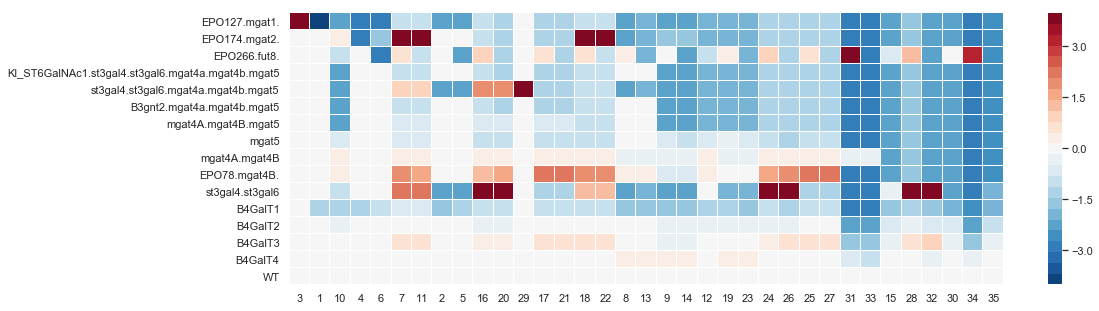

In [246]:
fig, ax = plt.subplots(figsize=(16,5))
ttest_table_reag = ttest_table.transpose()[rerearrange]
sns.heatmap(ttest_table_reag.round(2), vmin=-4, vmax=4, ax=ax, cmap=sns.color_palette("RdBu_r", 25), linewidths=.01, linecolor='white')
plt.savefig(keywords_dict['plot_output_dir']+keywords_dict['project_name']+'_adjusted_abundance_zscore_rescale.eps')
plt.show()

In [223]:
ttest_table.round(2).transpose().to_csv(keywords_dict['output_data_dir']+keywords_dict['project_name']+"_node_attri_zscore_redistributed.csv")

# Raw plots and related plots for Figure 3

['EPO127.mgat1.']
['EPO174.mgat2.']
['EPO266.fut8.', 'st3gal4.st3gal6']
['KI_ST6GalNAc1.st3gal4.st3gal6.mgat4a.mgat4b.mgat5', 'st3gal4.st3gal6.mgat4a.mgat4b.mgat5', 'B3gnt2.mgat4a.mgat4b.mgat5', 'mgat4A.mgat4B.mgat5']
['mgat5', 'mgat4A.mgat4B', 'EPO78.mgat4B.']
['B4GalT1', 'B4GalT2', 'B4GalT3', 'B4GalT4', 'WT']


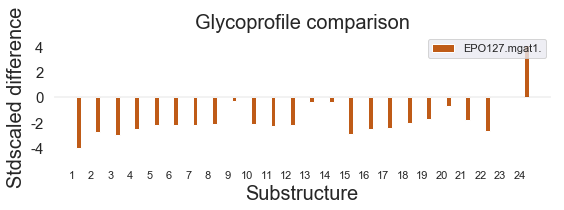

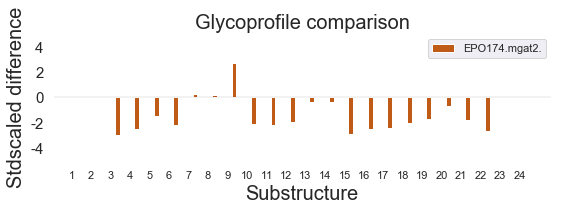

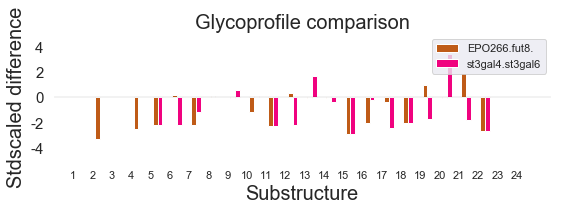

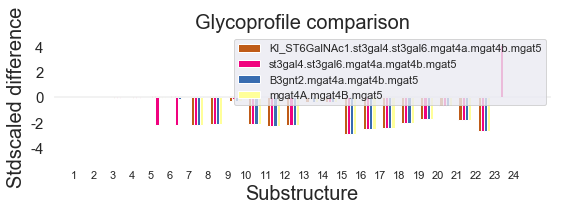

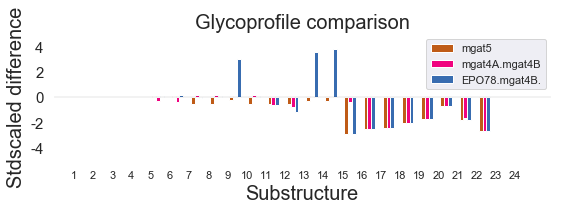

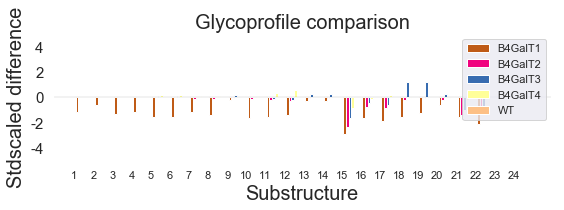

In [29]:
profile_dict={1:["EPO127.mgat1."],
2:["EPO174.mgat2."],
3:["EPO266.fut8.","st3gal4.st3gal6"],
4:["KI_ST6GalNAc1.st3gal4.st3gal6.mgat4a.mgat4b.mgat5",
   "st3gal4.st3gal6.mgat4a.mgat4b.mgat5",
   "B3gnt2.mgat4a.mgat4b.mgat5",
   "mgat4A.mgat4B.mgat5",
   ],
5:["mgat5",
   "mgat4A.mgat4B",
   "EPO78.mgat4B."],

7:["B4GalT1",
   "B4GalT2",
   "B4GalT3",
   "B4GalT4",
   "WT",]}
mod_profile_dict=profile_dict
sns.set(palette='Accent_r')
if 'B4GalT2' in substre_profile_zscore.columns:
    pass
else:
    substre_profile_zscore = substre_profile_zscore.transpose()
substre_profile_zscore=substre_profile_zscore.round(3)
substre_profile_zscore_with_baseWT = substre_profile_zscore.copy()
base = list(substre_profile_zscore.WT.tolist())
for i in substre_profile_zscore_with_baseWT.columns:
#     print(base)
    substre_profile_zscore_with_baseWT[i]=substre_profile_zscore_with_baseWT[i]-base
#     print(substre_profile_zscore_with_baseWT[i])
#     print(substre_profile_zscore_with_baseWT[i])
for i in sorted(mod_profile_dict):
#     for j in profile_dict[i]:
    _name_list = [x for x in mod_profile_dict[i]]
#     print(_name_list, len(_name_list))
    print(_name_list)
    compare_profile(deepcopy(substre_profile_zscore_with_baseWT[_name_list]), _name_list, ax=None, addr=keywords_dict['plot_output_dir']+keywords_dict['project_name']+"cluster_rep_abd_std_scaled"+str(i)+".eps")
    



In [30]:
# from sklearn.decomposition import PCA as pca
# # Y_sklearn = sklearn_pca.fit_transform(X_std)
# group_list = [1,1,1,2,2,2,2,4,3,3,3,5,5,5,5,5]

In [31]:
# import matplotlib.pyplot as plt
# def _pca(data_table, group_list):
#     sklearn_pca = pca(n_components=3)
#     projected = sklearn_pca.fit_transform(data_table)
#     print(sklearn_pca.explained_variance_ratio_)

#     fig, ax = plt.subplots()
# #     ax.scatter(z, y)


#     plt.scatter(projected[:, 0], projected[:, 1],
#                 c=group_list, edgecolor='none', alpha=0.5,
#                 cmap=plt.cm.get_cmap('Dark2',5), )
#     plt.xlabel('component 1')
#     plt.ylabel('component 2')
#     for i, txt in enumerate(data_table.index.tolist()):
#         ax.annotate(txt, (projected[i, 0]+0.1, projected[i,1]))
#     plt.colorbar();
    


In [32]:
# _pca(substre_profile.round(2), group_list)

In [33]:
# _pca(substre_profile_zscore.round(2), group_list)

In [34]:
# import plotly.plotly as py
# import plotly.graph_objs as go
# import plotly 
# plotly.tools.set_credentials_file(username='hoveathly', api_key='bcBZdP07AvxyJ605DwHM')

In [35]:
# ax.scatter(xs, ys, zs, marker=m)

# plt.colorbar();
# ax.set_xlabel('X Label')
# ax.set_ylabel('Y Label')
# ax.set_zlabel('Z Label')

In [36]:
# for i in substre_profile.index.tolist():
#     print(i)

In [37]:
# # x, y, z = np.random.multivariate_normal(np.array([0,0,0]), np.eye(3), 400).transpose()
# sklearn_pca = pca(n_components=3)
# projected = sklearn_pca.fit_transform(substre_profile)
# trace1 = go.Scatter3d(
#     x=projected[:, 0],
#     y=projected[:, 1],
#     z=projected[:, 2],
#     text=substre_profile_zscore.index.tolist(),
#     mode='markers',
#     marker=dict(
#         size=12,
#         color=group_list,                # set color to an array/list of desired values
#         colorscale='Viridis',   # choose a colorscale
#         opacity=0.8
#     )
# )

# data = [trace1]
# layout = go.Layout(
#     autosize=True,
#     hovermode='closest',
#     showlegend=False,
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     )

# )
# fig = go.Figure(data=data, layout=layout)
# py.iplot(fig, filename='3d-scatter-colorscale-2')

In [1]:
import glycompare


Thanks for using the GlyCompare v1.0, 
Please check our github for the latest update.


Bokan & Ben,
08/1/2019


